# Master Ingénierie de la Santé / Master Physique
## Physique Médicale, Radioprotection de l’homme et de l’environnement
**Université Grenoble-Alpes 2023-2024**

### Travaux Pratiques de modélisation pour la dosimétrie
#### TP #5 & 6: Initiation au calcul Monte Carlo

**Contacts:**
- Véronica Sorgato: [veronica.sorgato88@googlemail.com](mailto:veronica.sorgato88@googlemail.com)
- Samy Kefs: [samy.kefs@inserm.fr](mailto:samy.kefs@inserm.fr)
- Yannick Arnoud: [yannick.arnoud@lpsc.in2p3.fr](mailto:yannick.arnoud@lpsc.in2p3.fr)

**Données:**
Les données de coefficients d’atténuation et d’absorption en énergie de l’eau sont données dans le tableau «eau.xlsx». Il s’agit des données extraites de la base de données du NIST.
On considère des faisceaux de photons parallèles de 20 keV, 140 keV, 6 MeV et 18 MeV. On considère une cuve à eau (cf TP 2).

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from scipy.optimize import curve_fit
import tabulate as tb


---

# Introduction rapide sur la Génération de Nombres Aléatoires en Python

## Introduction

La génération de nombres aléatoires est une composante essentielle dans de nombreux domaines de l'informatique, y compris en physique, en simulation, en statistiques et en jeux. En informatique, les nombres générés ne sont pas vraiment aléatoires, mais plutôt pseudo-aléatoires, car ils dépendent d'une valeur initiale appelée "graine" ou "seed".

## La Graine (Seed) dans la Génération de Nombres Aléatoires

La graine est une valeur initiale utilisée par l'algorithme de génération de nombres aléatoires pour initialiser sa séquence. En Python, la fonction `random.seed()` permet de définir la graine.

```python
import random

# Définir la graine
random.seed(42)

# Générer un nombre aléatoire
random_number = random.random()
print(random_number)
```

Le choix de la graine détermine entièrement la séquence de nombres pseudo-aléatoires générée. Cela signifie que si vous utilisez la même graine, vous obtiendrez la même séquence de nombres à chaque exécution.

## Générateurs de Nombres Pseudo-Aléatoires

Python propose plusieurs algorithmes de génération de nombres pseudo-aléatoires, mais l'un des plus couramment utilisés est l'algorithme Mersenne Twister. L'algorithme Mersenne Twister tire son nom du fait qu'il utilise un nombre premier de Mersenne comme module. Il fonctionne en utilisant une suite récurrente définie par une récurrence linéaire sur un corps fini. L'idée est de maintenir un état interne, également appelé le vecteur d'état, qui est mis à jour à chaque génération de nombre aléatoire. Cet état est transformé de manière complexe pour produire la sortie aléatoire.
Ceci confére à cette algorithme une période très longue, ce qui signifie qu'il génère une séquence de nombres quasi infinie avant de se répéter.
Dans la fonction random.random du module random de Python, la graine par défaut n'est pas explicitement définie dans le code. Cela signifie que la graine par défaut dépend de la mise en œuvre spécifique de la bibliothèque random dans la version de Python que vous utilisez.

En général, la graine par défaut est souvent dérivée du temps actuel (par exemple, en utilisant l'horodatage). Cela rend la séquence de nombres pseudo-aléatoires générée par défaut relativement imprévisible.

```python
import random

# Utilisation de l'algorithme Mersenne Twister
random_number = random.random()
print(random_number)
```

Cependant, il est essentiel de noter que les nombres générés par les algorithmes pseudo-aléatoires ne sont pas vraiment aléatoires. Si vous connaissez la graine, vous pouvez prédire la séquence entière de nombres générés.

## Importance du Choix de la Graine

Le choix de la graine est crucial dans certaines applications. Par exemple, dans des simulations scientifiques, il peut être nécessaire de reproduire les mêmes conditions pour valider les résultats. Cependant, dans des contextes cryptographiques, la prévisibilité de la séquence générée peut être un inconvénient majeur.

## Génération de Nombres Aléatoires avec `numpy`

La bibliothèque `numpy` offre des générateurs de nombres pseudo-aléatoires plus avancés que ceux disponibles dans le module `random` standard. Elle est souvent utilisée dans des applications scientifiques et de simulation.

```python
import numpy as np

# Définir la graine avec numpy
np.random.seed(42)

# Générer un tableau de nombres aléatoires
random_array = np.random.rand(5)
print(random_array)
```

Ici aussi, le choix de la graine est essentiel pour reproduire les résultats.




---

## **Question 1**

1. A partir d’un nombre aléatoire R compris entre 0 et 1 et uniformément réparti, écrire le code pour générer un nombre aléatoire uniformément réparti entre min (valeur minimale) et max (valeur maximale).

\begin{equation}

    R_{scaled} = N_{min} + (N_{max} - N{min}) \times R

\end{equation}
$R \in [0,1]$, 

$R_{scaled} \in [N_{min},N_{max}]$

In [2]:
def rescaled_random_number(min_Value, max_Value):
    random_number = rd.random()
    return min_Value + (max_Value - min_Value) * random_number
min_Value = -1
max_Value = 1

print("Notre valeur aléatoire entre [min,max] vaut ",rescaled_random_number(min_Value, max_Value))


Notre valeur aléatoire entre [min,max] vaut  0.5456478960472095


In [3]:
# It's also possible to use an function to generate a random number in a range [min,max]

random_number = rd.uniform(min_Value, max_Value)
print("Notre valeur aléatoire entre [min,max] vaut ",random_number)

Notre valeur aléatoire entre [min,max] vaut  -0.7698633348239274


## **Question 2**

2. A partir d’un nombre aléatoire R compris entre 0 et 1 et uniformément réparti, écrire le code permettant de décider le tirage d’un dé à 6 faces.

In [4]:

for i in range(10):
    random_number = rd.random()
    random_number = random_number * 5 + 1


    # Pay attention to the rounding method used,
    # here we do not want to round up but round down (floor)
    # Because we cannot obtain with this method on dice

    print("Our random value between [1, 6] is floor method ", int(random_number), "or round method ", int(round(random_number, 0)))

    random_number = rd.randint(1, 6)
    print("Our random value between [1, 6] is ", random_number)



Our random value between [1, 6] is floor method  3 or round method  4
Our random value between [1, 6] is  3
Our random value between [1, 6] is floor method  2 or round method  3
Our random value between [1, 6] is  4
Our random value between [1, 6] is floor method  5 or round method  5
Our random value between [1, 6] is  3
Our random value between [1, 6] is floor method  3 or round method  3
Our random value between [1, 6] is  1
Our random value between [1, 6] is floor method  5 or round method  5
Our random value between [1, 6] is  5
Our random value between [1, 6] is floor method  2 or round method  2
Our random value between [1, 6] is  6
Our random value between [1, 6] is floor method  5 or round method  6
Our random value between [1, 6] is  2
Our random value between [1, 6] is floor method  3 or round method  3
Our random value between [1, 6] is  6
Our random value between [1, 6] is floor method  5 or round method  5
Our random value between [1, 6] is  4
Our random value between [1,

## **Question 3**

3. On connaît les valeurs de $\mu_{pe}=0,72 cm^{-1}$, $\mu_{Rayleigh}=0,01 cm^{-1}$, et $\mu_{Compton}=0,57 cm^{-1}$ pour un photon d’énergie inférieure à 1,022 MeV. À partir d’un nombre aléatoire R compris entre 0 et 1 et uniformément réparti, écrire le code permettant de décider quelle interaction va suivre le photon.



In [5]:
import random as rd

def interaction_type(mu_photoelectric, mu_rayleigh, mu_compton, mu_pairproduction):
    """
    Determines the type of interaction based on random number generation.

    Parameters:
    - mu_photoelectric: Attenuation coefficient for photoelectric interaction.
    - mu_rayleigh: Attenuation coefficient for Rayleigh scattering.
    - mu_compton: Attenuation coefficient for Compton scattering.
    - mu_pairproduction: Attenuation coefficient for pair production.

    Returns:
    - Interaction type: "Photoelectric", "Rayleigh", "Compton", or "Pairproduction".
    """
    # Generate a random number between 0 and 1
    random_number = rd.random()

    # Calculate the total attenuation coefficient
    mu_total = mu_photoelectric + mu_rayleigh + mu_compton + mu_pairproduction

    # Determine the type of interaction based on the random number
    if random_number < mu_photoelectric / mu_total:
        return "Photoelectric"
    elif random_number < (mu_photoelectric + mu_rayleigh) / mu_total:
        return "Rayleigh"
    elif random_number < (mu_photoelectric + mu_rayleigh + mu_compton) / mu_total:
        return "Compton"
    elif random_number < (
        mu_photoelectric + mu_rayleigh + mu_compton + mu_pairproduction
    ) / mu_total:
        return "Pairproduction"

# Attenuation coefficient values
mu_photoelectric = 0.72
mu_rayleigh = 0.01
mu_compton = 0.57
mu_pairproduction = 0.0

# Generate and print interaction types for 10 iterations
for i in range(0, 10):
    print(interaction_type(mu_photoelectric, mu_rayleigh, mu_compton, mu_pairproduction))


Compton
Photoelectric
Photoelectric
Compton
Photoelectric
Compton
Photoelectric
Photoelectric
Photoelectric
Photoelectric


## **Question 4**


4. Écrire le code Monte Carlo permettant d’estimer le nombre $\pi$ à partir de 2 nombres aléatoires tirés de manière uniforme entre 0 et 1. On pourra essayer de visualiser le carré et le cercle tels que vus en cours. Commentez chaque section de votre code (en annexe) et expliquer la formule qui estime $\pi$.

In [6]:
def pi_estimation0(n):
    # Creat a random number generator
    rng = np.random.default_rng()

    # Genereate random x and y coordinates
    x = rng.random(n)
    y = rng.random(n)

    # Initialize lists for points insde and outside the circle
    x_in_circle, y_in_circle = [], []
    x_out_circle, y_out_circle = [], []

    # Determin points inside and outside the circle
    for i in range(n):
        if x[i]**2 + y[i]**2 <= 1:
            x_in_circle.append(x[i])
            y_in_circle.append(y[i])
        else:
            x_out_circle.append(x[i])
            y_out_circle.append(y[i])

    # Calculate the estimated value of pi based on the ratio of points inside the circle
    pi = 4 * len(x_in_circle) / n

    return pi, x_in_circle, y_in_circle, x_out_circle, y_out_circle

# Perform pi estimation and obtain coordinates
pi, x_in_circle, y_in_circle, x_out_circle, y_out_circle = pi_estimation0(9000)
print("The estimated value of pi is ", pi)
print("The exact value of pi is ", np.pi)
print("The error relative to the exact value is ", abs(pi - np.pi) / np.pi)

# plt.figure(figsize=(5,5))
# plt.scatter(x_in_circle,y_in_circle, color = 'blue')    
# plt.scatter(x_out_circle,y_out_circle, color = 'red')   
# plt.show()


The estimated value of pi is  3.1604444444444444
The exact value of pi is  3.141592653589793
The error relative to the exact value is  0.006000711401304673


### Pour allez plus loin



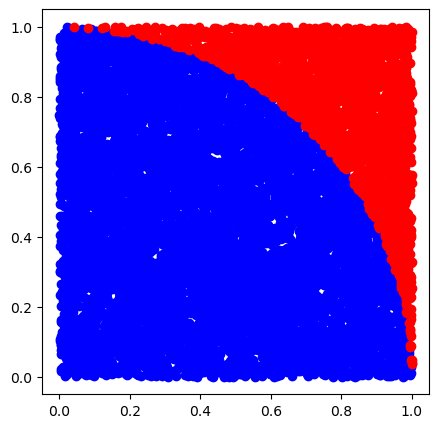

The estimated value of pi is  3.1124
The exact value of pi is  3.141592653589793
The error relative to the exact value is  0.009292310241569858
Number of points  10000


In [7]:
def pi_estimation1(n):
    # Create a random number generator
    rng = np.random.default_rng()

    # Generate x and y coordinates simultaneously
    coordinates = rng.random((n, 2))

    # Use vectorized operations (UFunc) to filter points inside and outside the circle
    x_in_circle = coordinates[coordinates[:, 0]**2 + coordinates[:, 1]**2 <= 1]
    x_out_circle = coordinates[coordinates[:, 0]**2 + coordinates[:, 1]**2 > 1]

    

    # Calculate the value of pi based on the ratio of points inside the circle
    pi = 4 * len(x_in_circle) / n
    return pi, x_in_circle, x_out_circle, n

# Example of usage
estimated_pi, x_in_circle, x_out_circle,n = pi_estimation1(10000)
# # Plot points inside and outside the circle
plt.figure(figsize=(5, 5))
plt.scatter(x_in_circle[:, 0], x_in_circle[:, 1], color='blue')
plt.scatter(x_out_circle[:, 0], x_out_circle[:, 1], color='red')
plt.show()

print("The estimated value of pi is ", estimated_pi)
print("The exact value of pi is ", np.pi)
print("The error relative to the exact value is ", abs(estimated_pi - np.pi) / np.pi)
print("Number of points ",n)


In [8]:
def pi_estimation2(n):
    # Generate random points within the unit square
    coordinates = np.random.rand(n, 2)

    # Calculate the distances from each point to the origin
    distances = np.linalg.norm(coordinates, axis=1)

    # Determine which points lie within the circle
    inside_circle = distances <= 1

    # Calculate the value of pi based on the ratio of points inside the circle
    pi = 4 * np.sum(inside_circle) / n
    return pi
pi = pi_estimation2(10000)
print("The estimated value of pi is ",pi )
print("The exact value of pi is ", np.pi)
print("The error relative to the exact value is ", abs(pi - np.pi) / np.pi)


The estimated value of pi is  3.1516
The exact value of pi is  3.141592653589793
The error relative to the exact value is  0.0031854372968347765


In [9]:
%timeit pi_estimation0(10000)
%timeit pi_estimation1(10000)
%timeit pi_estimation2(10000)

58.9 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.5 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.45 ms ± 998 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## **Question 5** *Bonus*


5. Bonus : Faire varier le nombre de tirages et commenter les résultats obtenus.

Estimated value of pi: 3.162


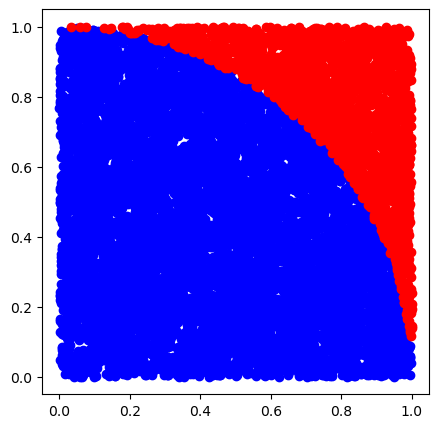

In [10]:
pi, x_in_circle, x_out_circle,_ = pi_estimation1(10000)
print("Estimated value of pi:", pi)
plt.figure(figsize=(5, 5))
plt.scatter(x_in_circle[:, 0], x_in_circle[:, 1], color='blue')
plt.scatter(x_out_circle[:, 0], x_out_circle[:, 1], color='red')
plt.show()

## **Question 6** *Bonus*

Bonus : A partir de quand avons-nous un écart relatif inférieur à 1/1000, inférieur à 1/100000. Mesurez le temps nécessaire pour obtenir ces incertitudes.


In [11]:
# Definition of the function that estimates π using a while loop
def pi_estimation_while_loop(deviation):
    
    # Initializing variables
    pi = 0          # Current estimate of π
    n = 0           # Total number of generated points
    dev = 1         # Initializing deviation to an arbitrarily higher value than the desired deviation
    in_circle = 0   # Number of points generated inside the unit circle
    
    # Initializing the random number generator from the NumPy library
    rng = np.random.default_rng()
    
    # Loop until the deviation is greater than the desired value
    while deviation < dev :
        
        # Generating random coordinates as an array of shape (1, 2)
        coordinate = rng.random((1, 2))
        
        # Checking if the point is inside the unit circle
        if coordinate[0, 0]**2 + coordinate[0, 1]**2 <= 1:
            in_circle += 1
        
        # Updating the total number of generated points
        n += 1
        
        # Estimating π based on the number of points inside the circle
        pi = 4 * in_circle / n
        
        # Calculating the deviation from the true value of π
        dev = (abs(pi - np.pi) / np.pi)
        
    # Returns the final estimate of π, the total number of generated points, and the deviation
    return pi, n, dev


In [12]:
pi, n, dev = pi_estimation_while_loop(1e-7)
print("The estimated value of pi is ", pi)
print("The exact value of pi is ", np.pi)
print("The error relative to the exact value is ", abs(pi - np.pi) / np.pi)
print("The number of iterations is ", n)


The estimated value of pi is  3.1415928510451665
The exact value of pi is  3.141592653589793
The error relative to the exact value is  6.285199742862876e-08
The number of iterations is  127683


## **Remarque**

#### *Pourquoi la boucle while converge plus vite vers une valeur plus precise que lorsque l'on utilise un nombre de tirage predefinie ?*

Ceci est donc la question que je me suis posé, avec la boucle `while` il suffis de peu de tirage pour obtenir une precision trés elevé. Or, avec un nombre de tirage beaucoup plus important nous obtenons une precision moins grande.
La principal raison de la différence de précision entre les deux approches réside dans la nature de la boucle `while` et la condition de terminaison. Dans l'approche initiale avec un nombre fixe de tirages (1 000 000), la précision dépant du nombre de tirages, et augmenter le nombre de tirages ne conduit pas nécessairement à une précision accrue en raison de la nature pseudo-aléatoire des nombres.

D'autre part, l'approche de la boucle `while` ajuste dynamiquement le nombre de tirages en fonction de l'écart par rapport à la vraie valeur de $\pi$. La boucle while se termine lorsque l'écart (`dev`) est inférieur à la marge spécifiée (`deviation`). Cela signifie que la boucle while continue jusqu'à ce qu'une estimation suffisamment précise soit obtenue, et le nombre de tirages n'est pas fixé à l'avance.

---

## **Context**

On s’intéresse à l’émission isotrope d’une source. Les coordonnées privilégiées dans ce cas sont les coordonnées sphériques.

## **Question 7**

7. Ecrire le code Monte Carlo permettant de simuler l’émission isotrope d’une source. Pour obtenir l’angle azimutal , vous utiliserez la méthode de rejet (bonus: la méthode d’inversion de la fonction de répartition). Représentez le passage des photons par la surface d’une sphère (histogramme 3D) de rayon 1m.


___


## **Rappel**

Bien sûr, voici votre texte formaté en Markdown :


### Simulation de l'émission isotrope avec la méthode de rejet

#### Introduction

La simulation de l'émission isotrope d'une source peut être réalisée à l'aide de la méthode de Monte Carlo en utilisant la méthode de rejet. Cette approche garantit que les photons sont émis de manière isotrope sur la surface d'une sphère.

#### Méthode de Rejet

La méthode de rejet est une technique courante pour générer des échantillons aléatoires à partir d'une distribution de probabilité donnée. Elle est souvent utilisée dans le contexte de simulations Monte Carlo. Dans notre cas, nous voulons échantillonner les angles polaires $\theta$ et azimutaux $\phi$ de manière à respecter la distribution de probabilité $F(\theta)$ définie comme:

\begin{equation}
F(\theta) = \int_{0}^{\pi} \int_{0}^{2\pi} A \sin{\theta} \,d\theta \,d\varphi \quad \text{avec } \varphi \ \in [0,2\pi] \ \text{et} \ \theta \ \in [0,\pi]
\end{equation}

Nous utilisons les coordonnées sphériques pour générer les points sur la surface de la sphère:

\begin{align}
x &= \sin \theta \times \cos \varphi \\
y &= \sin \theta \times \sin \varphi \\
z &= \cos \theta
\end{align}

La méthode de rejet consiste à générer aléatoirement $\theta$ et $\varphi$ et à les accepter seulement si $\sin \theta > R$, où $R$ est un nombre aléatoire uniformément distribué entre 0 et 1. Sinon, le point est rejeté. Cette condition garantit que les points sont générés avec une probabilité proportionnelle à $A \sin{\theta}$.



#### Résultats

Le code génère des coordonnées $(x, y, z)$ pour les photons émis de manière isotrope sur la surface de la sphère. Ces coordonnées peuvent ensuite être utilisées pour représenter le passage des photons par la surface de la sphère sous la forme d'un histogramme 3D.





In [13]:
def isotrope_Emission_0(nb_photons):
    photons = 0
    coordinate = np.zeros((nb_photons, 3))
    tirage = 0
    theta_in = []
    theta_out = []  
    R_out= []
    R_in= []
    while True :
        
        # Generate random numbers for the polar and azimuthal angles
        theta = np.random.uniform(0, np.pi)
        
        phi = np.random.uniform(0, 2 * np.pi)
        R =np.random.uniform(0,1)
        if np.sin(theta) > R:
            R_in.append(R)
            theta_in.append(theta)
            coordinate[photons,0] = np.sin(theta) * np.cos(phi)
            coordinate[photons,1] = np.sin(theta) * np.sin(phi)
            coordinate[photons,2] = np.cos(theta)
            photons += 1
        else:
            theta_out.append(theta)
            R_out.append(R)
        tirage += 1
        if photons == nb_photons:
            print("Nombre de tirages ",tirage)
            break
    return coordinate,theta_in,theta_out,R_in,R_out

    

Nombre de tirages  15566


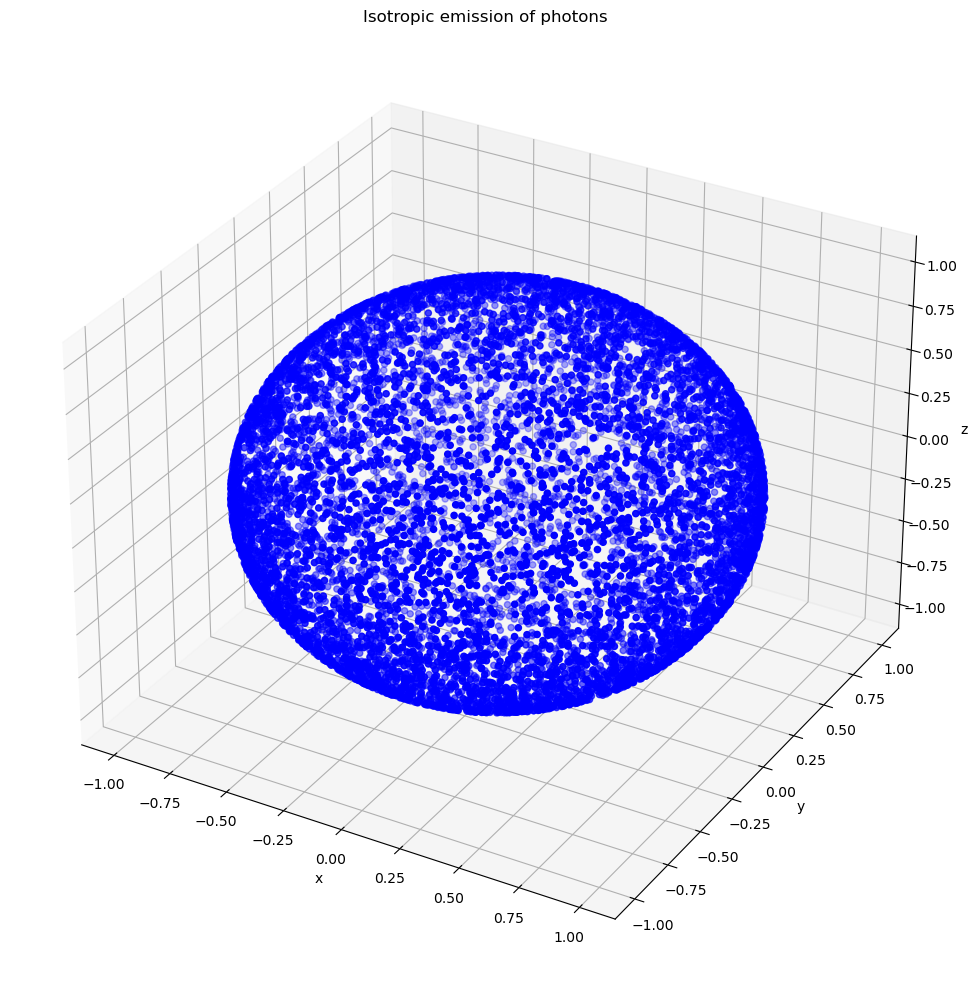

In [14]:
coordinate,theta_in,theta_out, R_in,R_out = isotrope_Emission_0(10000)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinate[:, 0], coordinate[:, 1], coordinate[:, 2], color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Isotropic emission of photons')
plt.tight_layout()
plt.show()


## **Suite Rappel**

On peut verifier ici que notre emission selon theta respect bien une loi en sinus

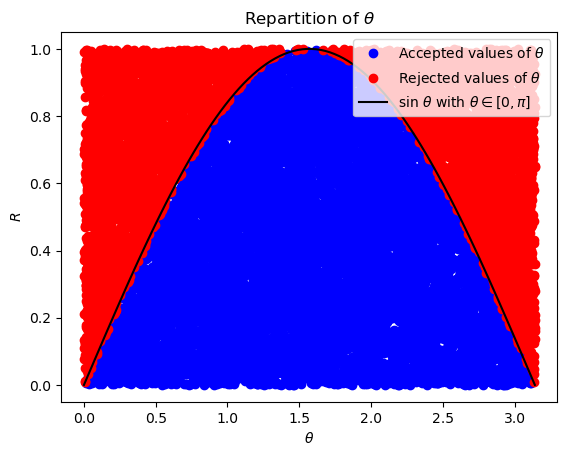

In [15]:
sin = np.linspace(0, np.pi, 100)
plt.plot(theta_in, R_in, 'o', color='blue', label=r'Accepted values of $\theta$')
plt.plot(theta_out, R_out, 'o', color='red', label=r'Rejected values of $\theta$ ')
plt.plot(sin, np.sin(sin), color='black', label=r'sin $\theta$ with $\theta \in [0,\pi]$ ')
plt.title(r'Repartition of $\theta$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$R$')
plt.legend()
plt.show()

## **Rappel**

 
### **Inversion de la fonction de répartition**

Ici, nous verrons le développement mathématique pour arriver à la génération d'échantillons isotropes pour $\theta$ et $\phi$ en utilisant la méthode de Monte Carlo.

#### **Génération de $\theta$**

La distribution de probabilité pour $\theta$ est $\sin(\theta)$, où $\theta$ varie de 0 à $\Theta$ (l'angle maximal que vous spécifiez) pour une émission sur une sphère où $\theta \in [0,\pi]$.

La fonction de répartition $F(\theta)$ est l'intégrale de la distribution de probabilité :
\begin{equation}
F(\theta) = \int_0^\theta A \sin(\theta) \, d\theta
\end{equation}

Intégrons cette fonction de répartition :
\begin{equation}
F(\theta) = -A \cos(\theta) \Big|_0^\theta = -A \cos(\theta) + A = A (1-\cos(\theta))
\end{equation}

##### **Normalisation de la FDR :**

Pour que la FDR soit égale à 1 au total, nous égalisons $F(\pi)$ à 1 :
\begin{equation}
1 = -A \cos(\pi) + A = A(1 + 1) = 2A
\end{equation}

##### **Égalisation à $R_1$  pour résoudre $\theta$**

Maintenant, nous égalisons $F(\theta)$ à $R_1$, un nombre aléatoire entre 0 et 1, pour résoudre $\theta$ :
\begin{equation}
R_1 = -A \cos(\theta) + A = \frac{1}{2}\cos(\theta) - \frac{1}{2} \implies \cos(\theta) = 1 - 2R_1 \implies \theta = \arccos(1 - 2R_1)
\end{equation}

### **Génération de $\phi$**

La distribution de probabilité pour $\phi$ est uniforme entre 0 et $2\pi$. Ainsi, il suffit de générer un nombre aléatoire $R_2$ entre 0 et 1 et de calculer $\phi$ :
\begin{equation}
\phi = 2\pi R_2
\end{equation}

Cela donne un angle $\phi$ uniformément distribué entre 0 et $2\pi$.

### **Conversion en coordonnées cartésiennes**

Une fois que vous avez $\theta$ et $\phi$, vous pouvez convertir ces coordonnées sphériques en coordonnées cartésiennes à l'aide des équations :
\begin{equation}
x = \sin(\theta) \cos(\phi), \quad y = \sin(\theta) \sin(\phi), \quad z = \cos(\theta)
\end{equation}

Ces coordonnées $x, y, z$ représentent un vecteur unitaire dans la direction spécifiée par $\theta$ et $\phi$.


In [16]:
def isotrope_Emission(nb_photons):
    coordinate = np.zeros((nb_photons, 3))
    for i in range(nb_photons):
        theta = np.arccos(1- 2* rd.random())
        phi = rd.random() * 2 * np.pi
        
        
        coordinate[i,0] = np.sin(theta) * np.cos(phi)
        coordinate[i,1] = np.sin(theta) * np.sin(phi)
        coordinate[i,2] = np.cos(theta)
        
        
    return coordinate

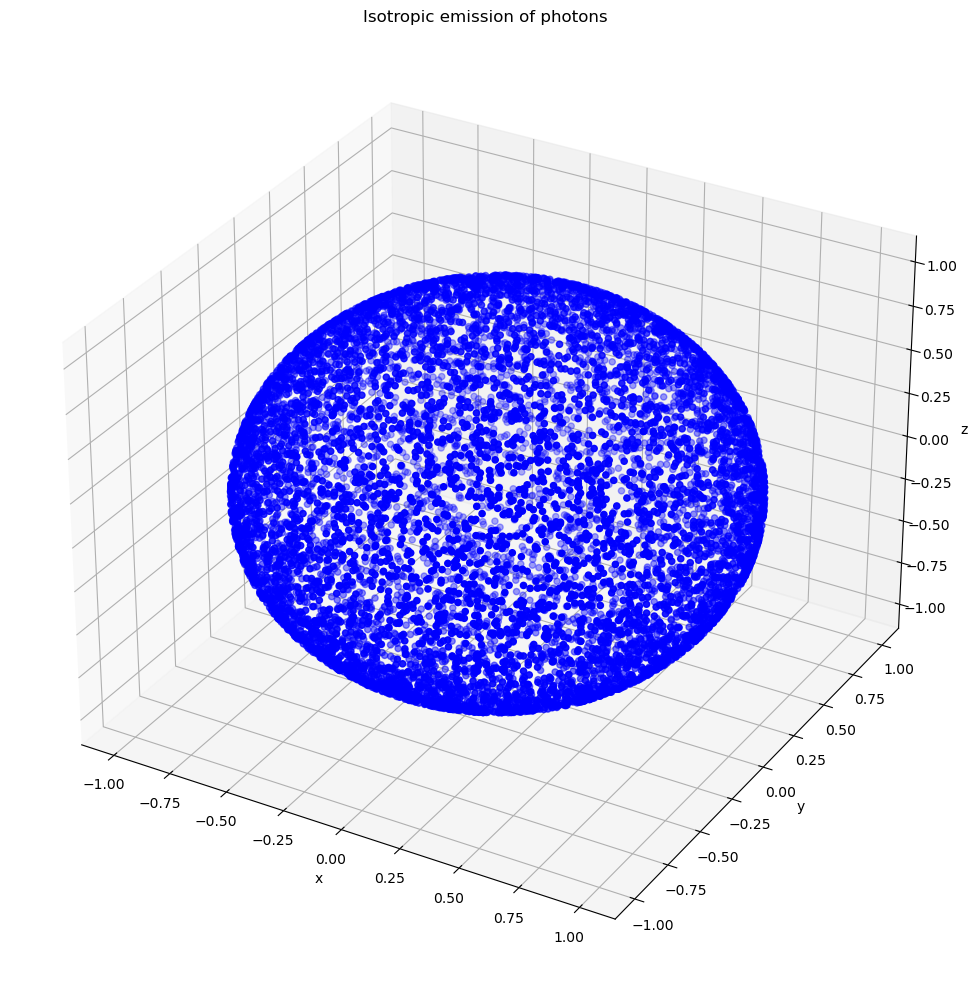

In [17]:
coordinate = isotrope_Emission(10000)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinate[:, 0], coordinate[:, 1], coordinate[:, 2], color='blue')
plt.title("Isotropic emission of photons")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()


## Pour allez plus loin 

Dans le cadre des travaux pratiques précédents, nous avons constaté qu'il est possible d'optimiser davantage les algorithmes en recourant à des approches telles que la vectorisation et l'utilisation de UFunc (Universal Functions). Ces techniques visent à rendre les algorithmes plus efficaces, améliorant ainsi leur rapidité d'exécution.

In [18]:
def isotrope_EmissionV2(nb_photons): 
    # Generate random numbers for the polar angle and the azimuthal angle
    theta = np.random.uniform(size=nb_photons)
    theta = np.arccos(1- 2 * theta)
    phi = np.random.uniform(0, 2 * np.pi, nb_photons)

    # Calculate the x, y, and z coordinates of the photons
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return x, y, z

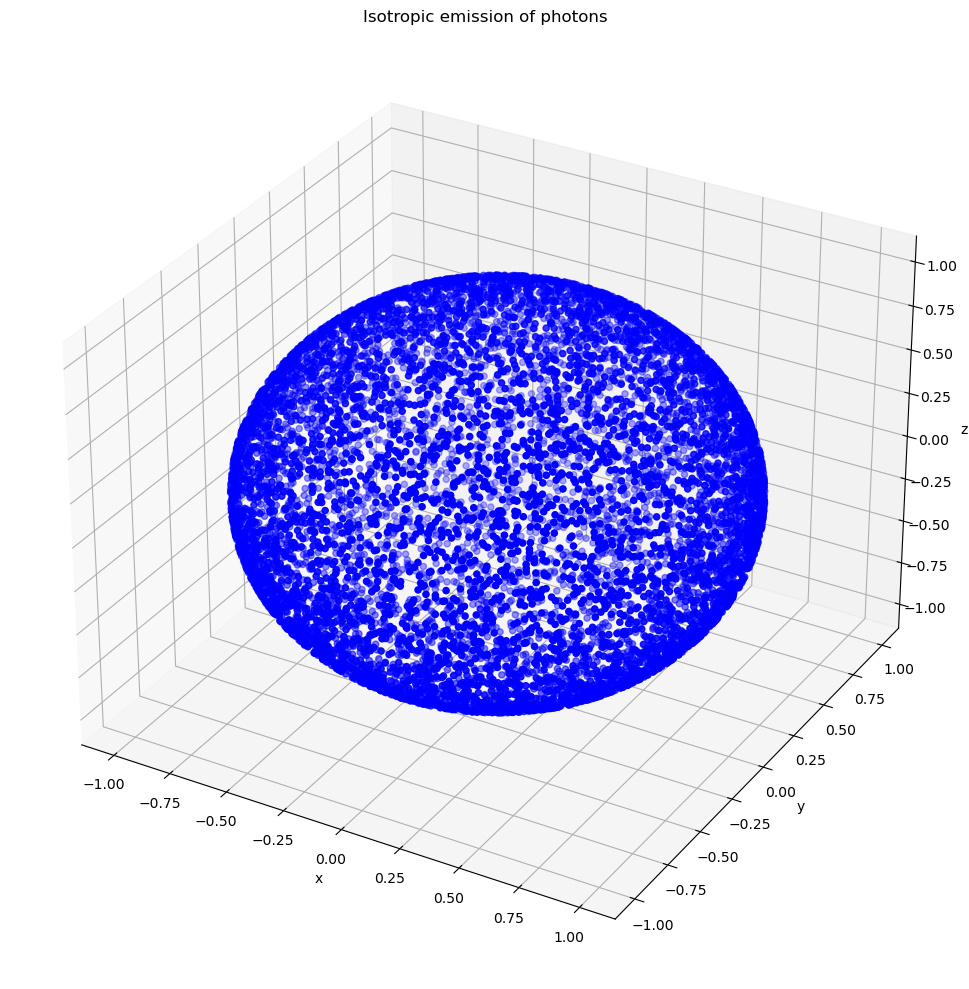

In [19]:
x, y, z = isotrope_EmissionV2(10000)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue')
plt.title("Isotropic emission of photons")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()

In [20]:
# Time the differents methods

%timeit isotrope_Emission(100000)
%timeit isotrope_EmissionV2(100000)


# On my computer, the second method is 100 times faster than the first one

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
4.65 s ± 2.49 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.6 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## **Question 8**

8. On souhaite collimater la source de telle façon que les photons de la source isotrope soient émis selon un cône. La génératrice de ce cône est l’axe de la sphère, et son angle au centre vaut 10° , ce qui correspond à une ouverture de 20°.


## **Rappel**

# Émission selon un angle

Ici, nous développerons mathématiquement la génération d'échantillons isotropes pour $\theta$ et $\phi$, avec $\theta$ restreint à $\in [0,\theta_{\text{max}}]$ en utilisant la méthode de Monte Carlo.

## Génération de $\theta$

La distribution de probabilité pour $\theta$ est $\sin(\theta)$, où $\theta$ varie de 0 à $\Theta$ (l'angle maximal que vous spécifiez) pour une émission sur une sphère, on aura $\theta \in [0,\pi]$.

La fonction de répartition $F(\theta)$ est l'intégrale de la distribution de probabilité :
\begin{equation}
F(\theta)_{\text{max}} = \int_0^\theta A \sin(\theta) \, d\theta
\end{equation}

Intégrons cette fonction de répartition :
\begin{equation}
    F(\theta)_{\text{max}} = -A \cos(\theta) \Big|_0^\theta = -A \cos(\theta) + A = A (1-\cos(\theta))
\end{equation}

## Normalisation de la FDR :

Pour que la FDR soit égale à 1 au total, nous égalisons $F(\theta)_{\text{max}}$ à 1 :

\begin{equation}
    1 = -A \cos(\theta_{\text{max}}) + A \implies A = \frac{1}{1 - \cos(\theta_{\text{max}})}
\end{equation}

Si l'on met les équations l'une dans l'autre, inverser la FDR et simuler vous donnera un resultat avec la forme estimer mais surestimé.


Le problème réside dans le fait que l'on surestime en réalité le nombre de photons. Pour rappel, $F(\theta) \in [0,\pi]$ vaut $\frac{1}{2}(1-\cos(\theta))$. Si l'on prend $F(\theta) \in [0,\pi]$, on surestimera le nombre de photons émis par rapport à $F(\theta)_{\text{max}} \in [0,\theta_{\text{max}}]$. Il faut donc quantifier de combien est cette surestimation. Cela permettra d'appliquer ce facteur correctif à $F(\theta) \in [0,\pi]$ pour avoir une émission contrainte et non surestimée.

Pour ce faire, on réalise :

\begin{equation}
    \frac{F(\theta)_{\text{max}}}{F(\theta)} = \frac{A\cancel{(1-\cos(\theta))}}{\frac{1}{2}\cancel{(1-\cos(\theta))}} = 2A
\end{equation}

On remarque dans cette equation que la surestimation est de $2A$. On aura donc :

\begin{align*}
    F(\theta) = \frac{1}{2A}F(\theta)_{\text{max}} \implies\\
    &\cancel{\frac{1}{2}}(1-\cos(\theta)) = \cancel{\frac{1}{2}}(1-\cos(\theta_{\text{max}}))F(\theta)_{\text{max}} \implies \\
    &\theta = \arccos\left(1-  ((1- \cos(\theta_{\text{max}}))F(\theta)_{\text{max}})\right)
\end{align*}


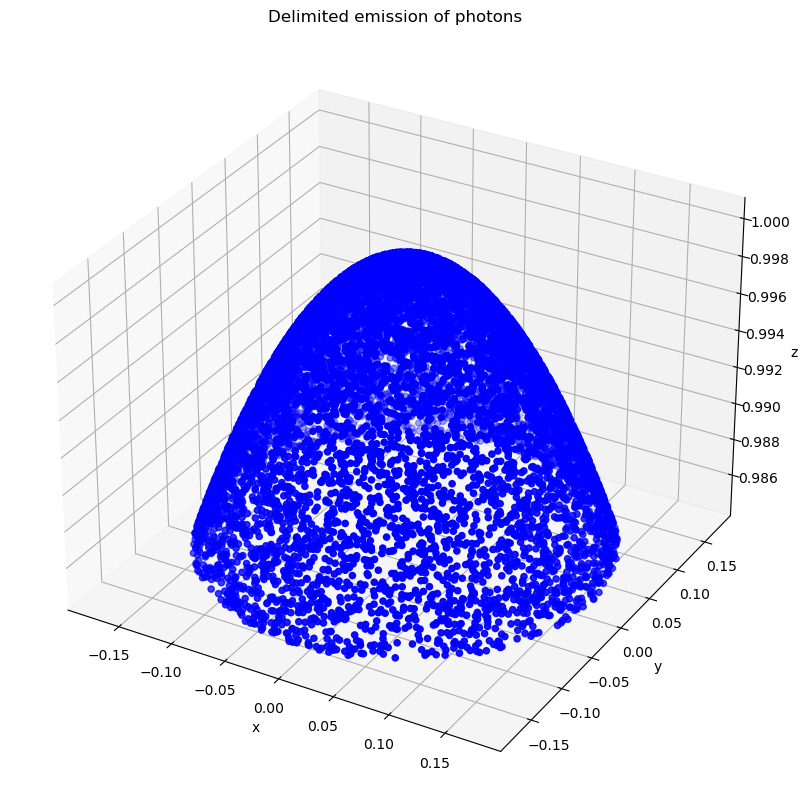

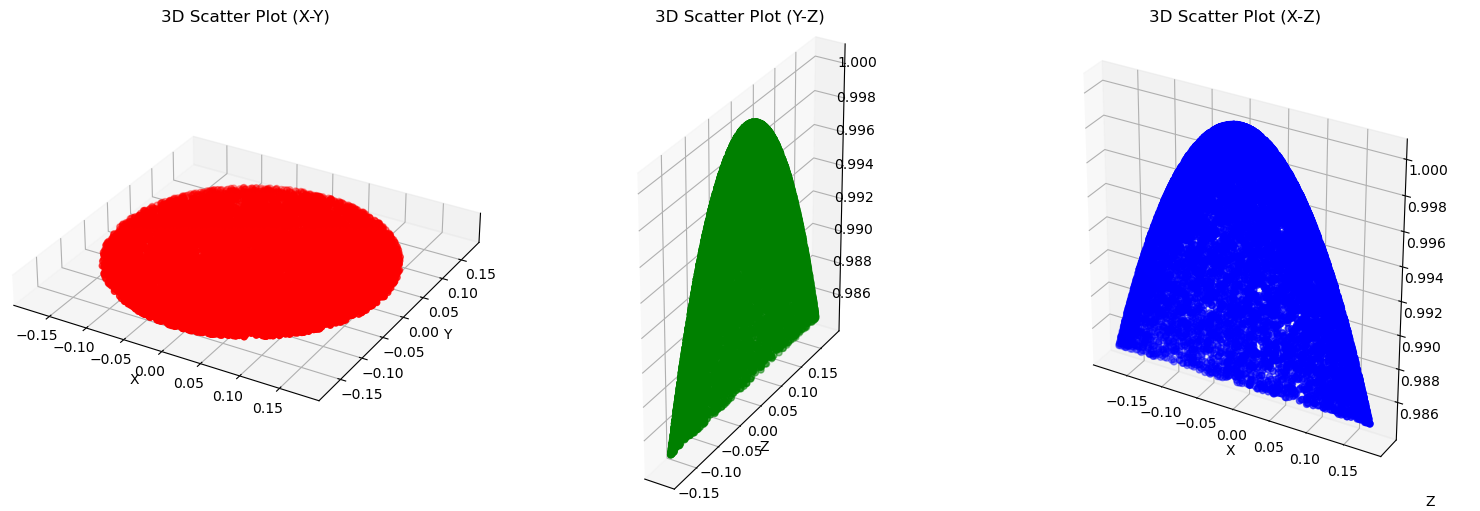

In [21]:
from mpl_toolkits.mplot3d import Axes3D

def delimited_emission(angle, nb_photons):
    angle = np.deg2rad(angle)
    R = np.random.uniform(size=nb_photons)
    phi = np.random.uniform(0, 2 * np.pi, nb_photons)
    theta = 0.5 * (1-np.cos(angle))* R
    theta = np.arccos(1- 2 * theta)
    # theta = (R*(1+np.cos(angle))-1)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return x, y, z

x, y, z = delimited_emission(10, 10000)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue')
plt.title("Delimited emission of photons")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Plot 3D scatter plots
fig = plt.figure(figsize=(15, 5))

# Plot x-y

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x, y, c='r', marker='o')
ax1.set_box_aspect([1, 1, 0.1]) 

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('3D Scatter Plot (X-Y)')
ax1.set_zticks([])

# Plot y-z
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(0, y, z, c='g', marker='o')
ax2.set_box_aspect([0.1, 1, 1])
ax2.set_xlabel('Y')
ax2.set_ylabel('Z')
ax2.set_title('3D Scatter Plot (Y-Z)')
ax2.set_xticks([])

# Plot x-z
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(x, 0 ,z, c='b', marker='o')
ax3.set_box_aspect([1, 0.1, 1])
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.set_title('3D Scatter Plot (X-Z)')
ax3.set_yticks([])

plt.tight_layout()
plt.show()

    

## **Context**

On considère maintenant la propagation de photons dans une cuve à eau.



## **Question 9.1**

9. Calculez par la méthode de Monte Carlo la distance parcourue dans l’eau avant interaction par chaque photon:

- Methode elementaire

### **Rappel**

On a : 
\begin{equation}
    dP = \mu dx
\end{equation}
- En fixant une valeur élémentaire $dx = 10^{-3} \text{cm}$, par exemple.
- On tire un nombre aléatoire $R_1$.
- On initialise le parcours $Dist$ de la particule à $Dist = 0$.
- On vérifie si $R_1 \geq \mu \cdot dx$.
  - Si $R_1 \geq \mu \cdot dx$, alors $Dist_{new} = Dist_{old} + dx$ et le processus est répété.
  - Lorsque $R_1 \leq \mu \cdot dx$, on considérera que la particule a interagi à une distance $P - \frac{dx}{2}$.

  ___

Pour commencer, il faut importer les données aux bonnes energies.


**Si vous voulez modifier les energies pour pour le reste du code c'est ici que ca se passe.**
---

/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/1151055682.py:13: RuntimeWarning: divide by zero encountered in log
  data_interpolation[key] = np.exp(np.interp(np.log(energy_value), np.log(data["Energy"]), np.log(data[key])))


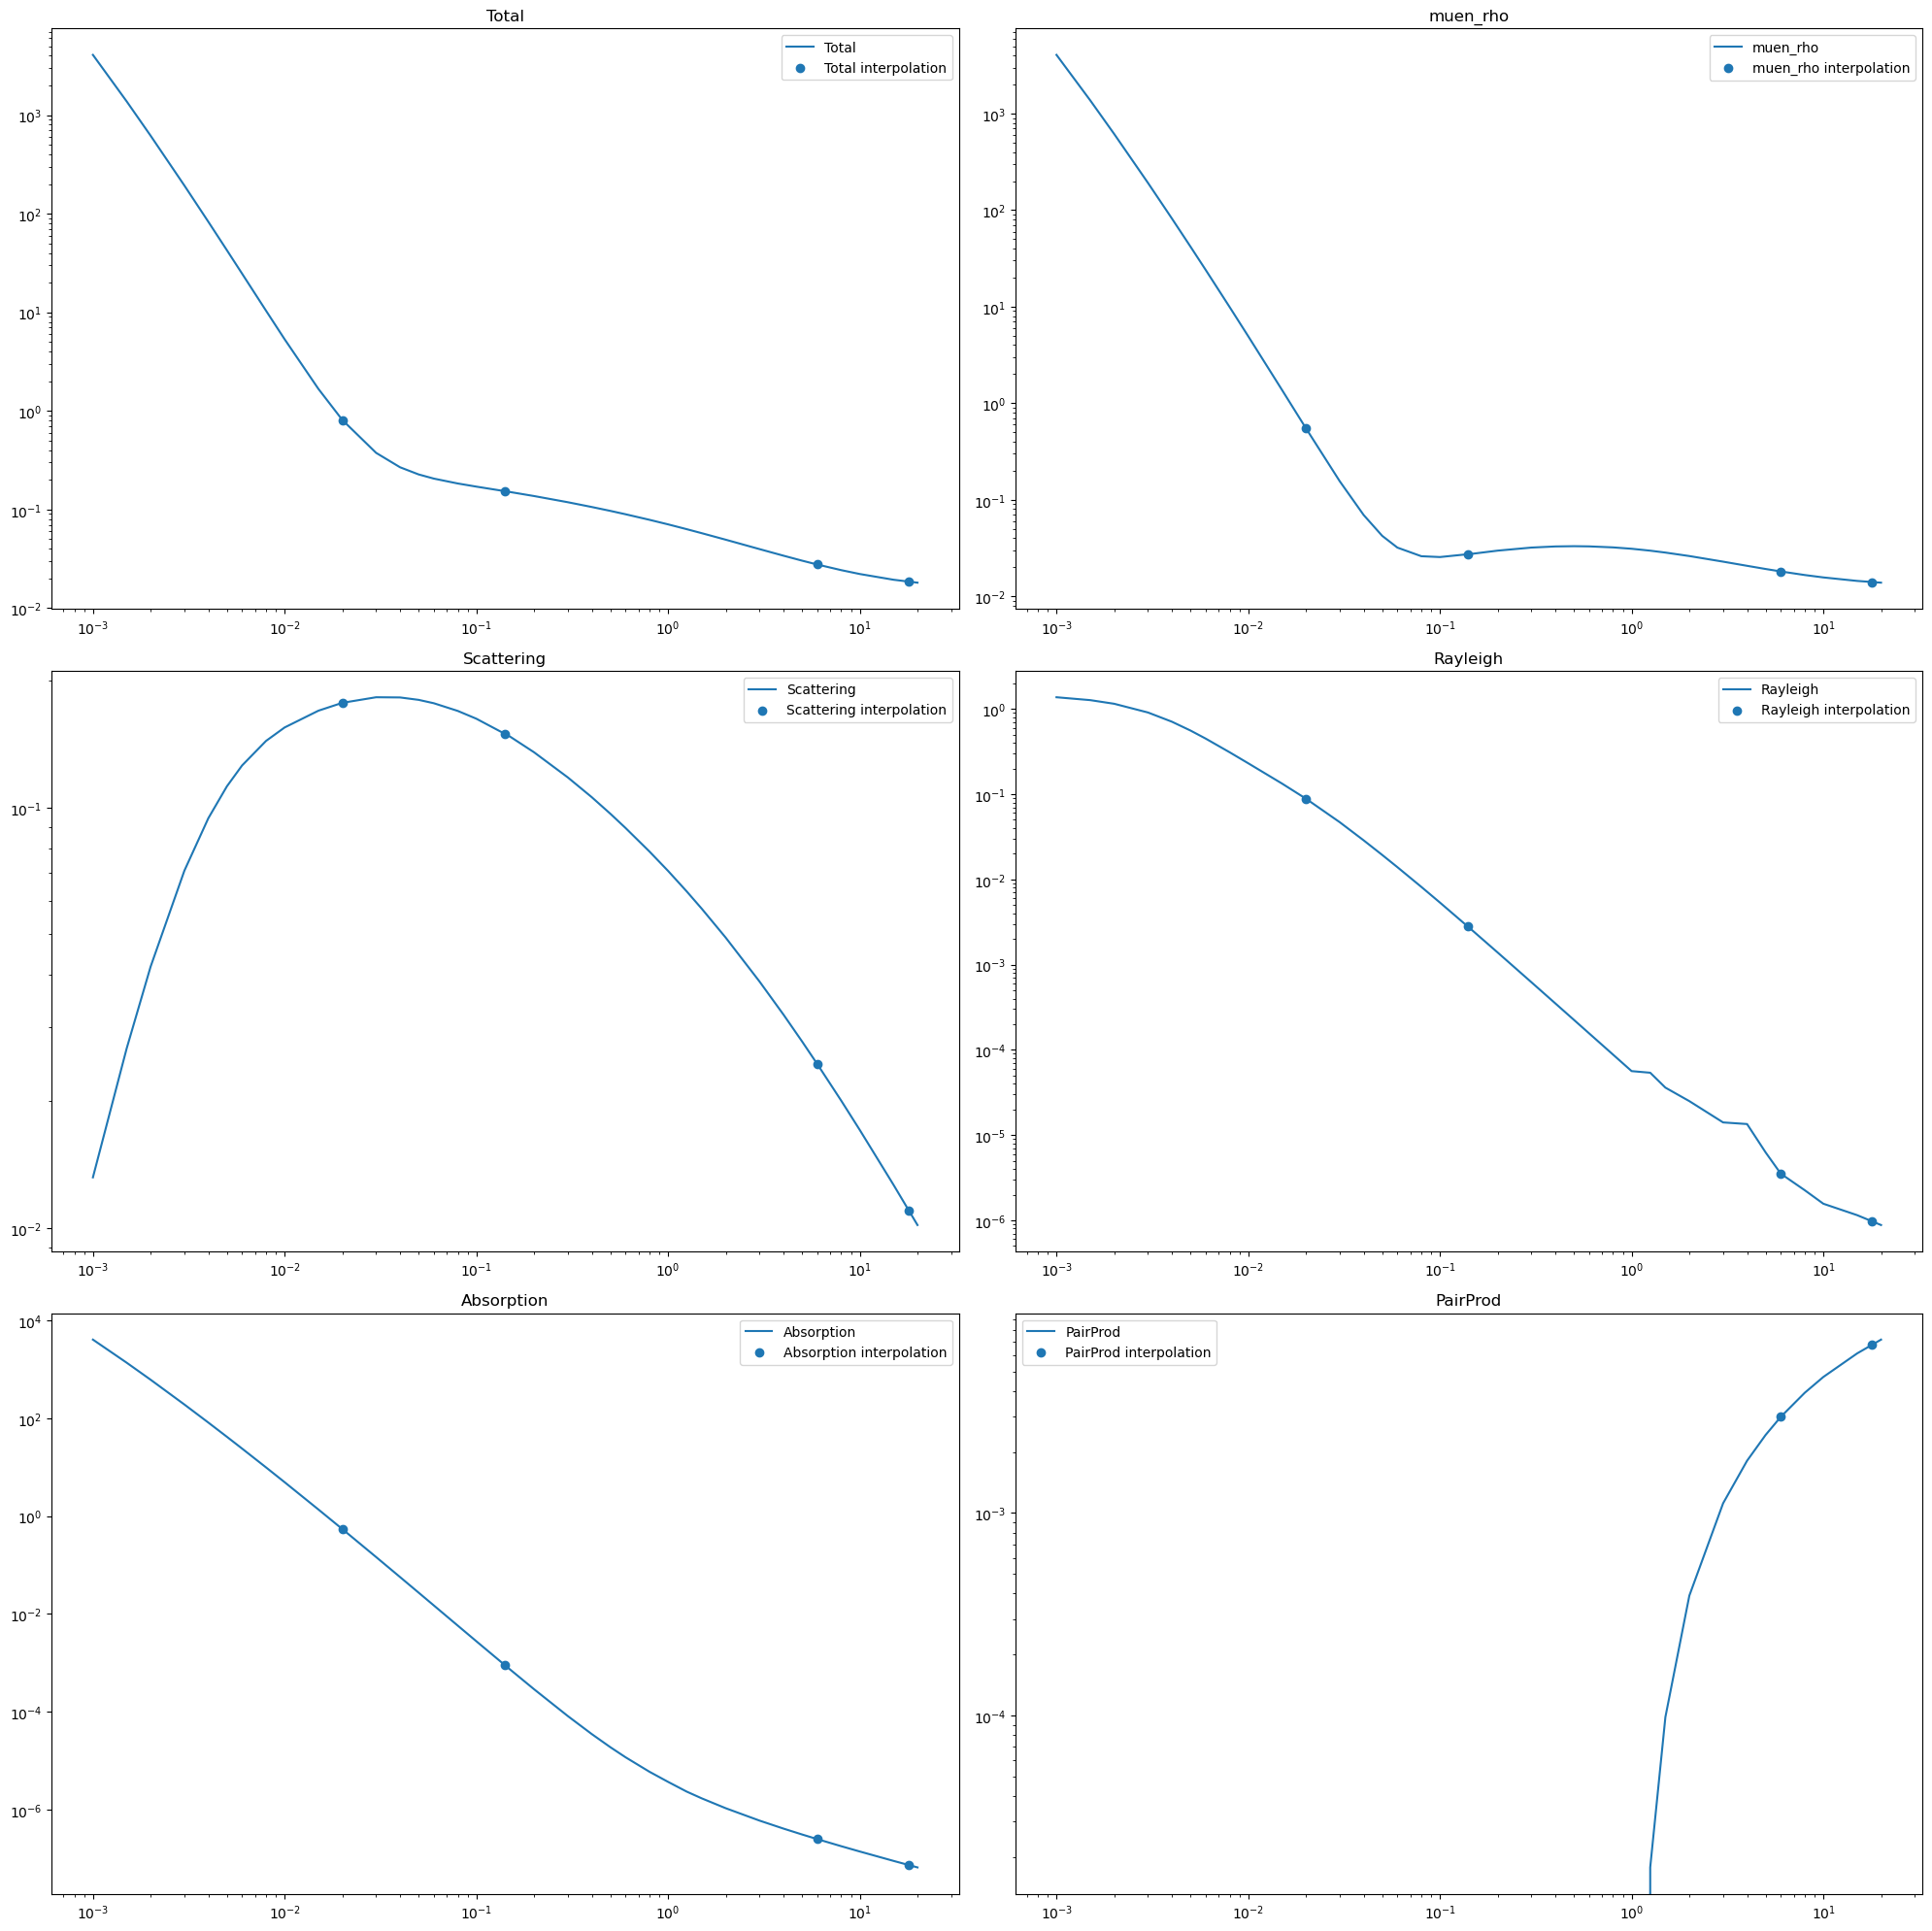

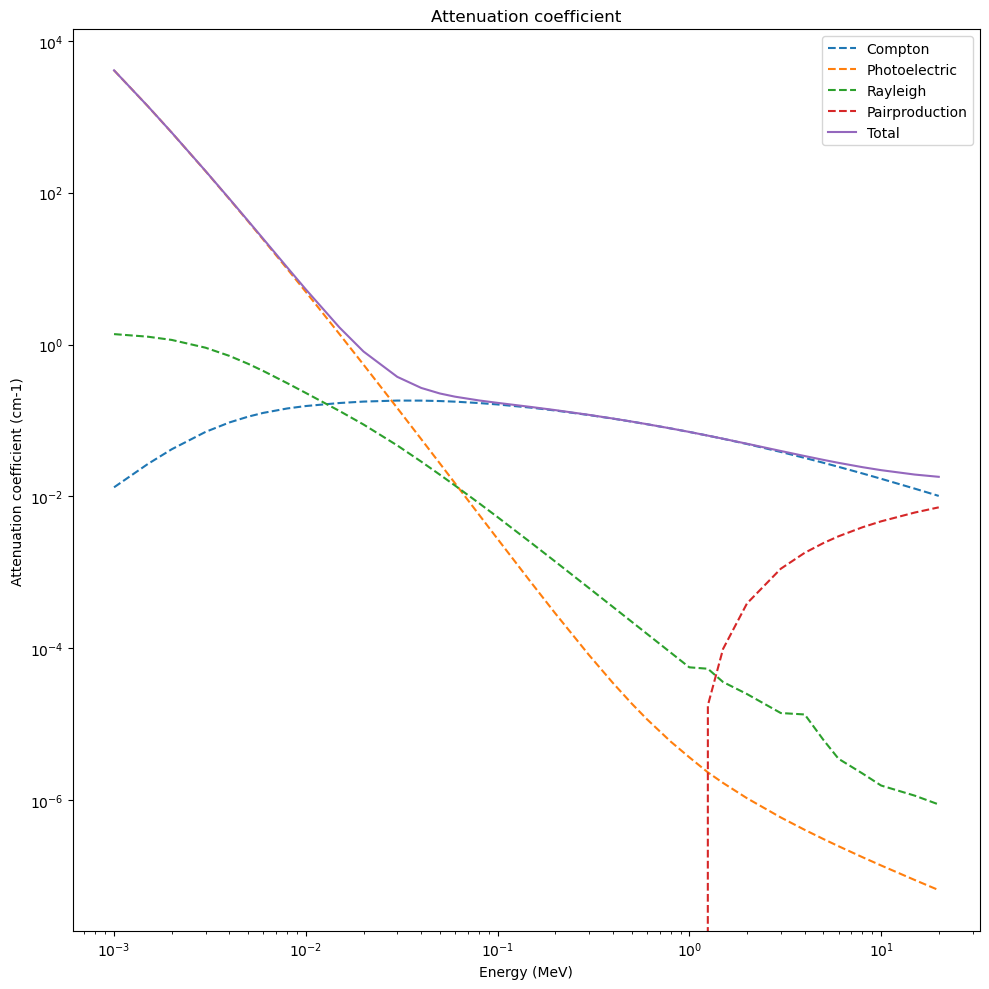

In [22]:
df= pd.read_excel("/Users/samy/Desktop/PhD/TP_Dosimetrie_M2/TP04/Data_Water.xlsx")

energy_value = np.array([0.02,0.140,6,18])
data={}
for col in df.columns:
    data[col]=df[col].to_numpy()

data_interpolation = {}
i=0
plt.figure(figsize=(20, 20))

for key, value in data.items():
    if key != "Energy":
        data_interpolation[key] = np.exp(np.interp(np.log(energy_value), np.log(data["Energy"]), np.log(data[key])))
        plt.subplot(3, 2, i+1)
        plt.plot(df["Energy"],df[key],label=key)
        plt.scatter(energy_value,data_interpolation[key],label=key + " interpolation")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()
        plt.title(key)
        i+=1
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(df["Energy"],df["Scattering"],label="Compton",linestyle="--")
plt.plot(df["Energy"],df["Absorption"],label="Photoelectric",linestyle="--")
plt.plot(df["Energy"],df["Rayleigh"],label="Rayleigh",linestyle="--")
plt.plot(df["Energy"],df["PairProd"],label="Pairproduction",linestyle="--")
plt.plot(df["Energy"],df["Total"],label="Total")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (MeV)")
plt.ylabel("Attenuation coefficient (cm-1)")
plt.legend()
plt.title("Attenuation coefficient")
plt.tight_layout()
plt.show()

        

In [23]:
def distanceTraveled(nbParticules,mu,dx=1e-3):
    finalDistance = np.zeros(nbParticules)
    for i in range(nbParticules):
        distannce = 0
        
        while rd.random() > mu * dx:
            distannce += dx
        finalDistance[i] = distannce
    
    
    return finalDistance

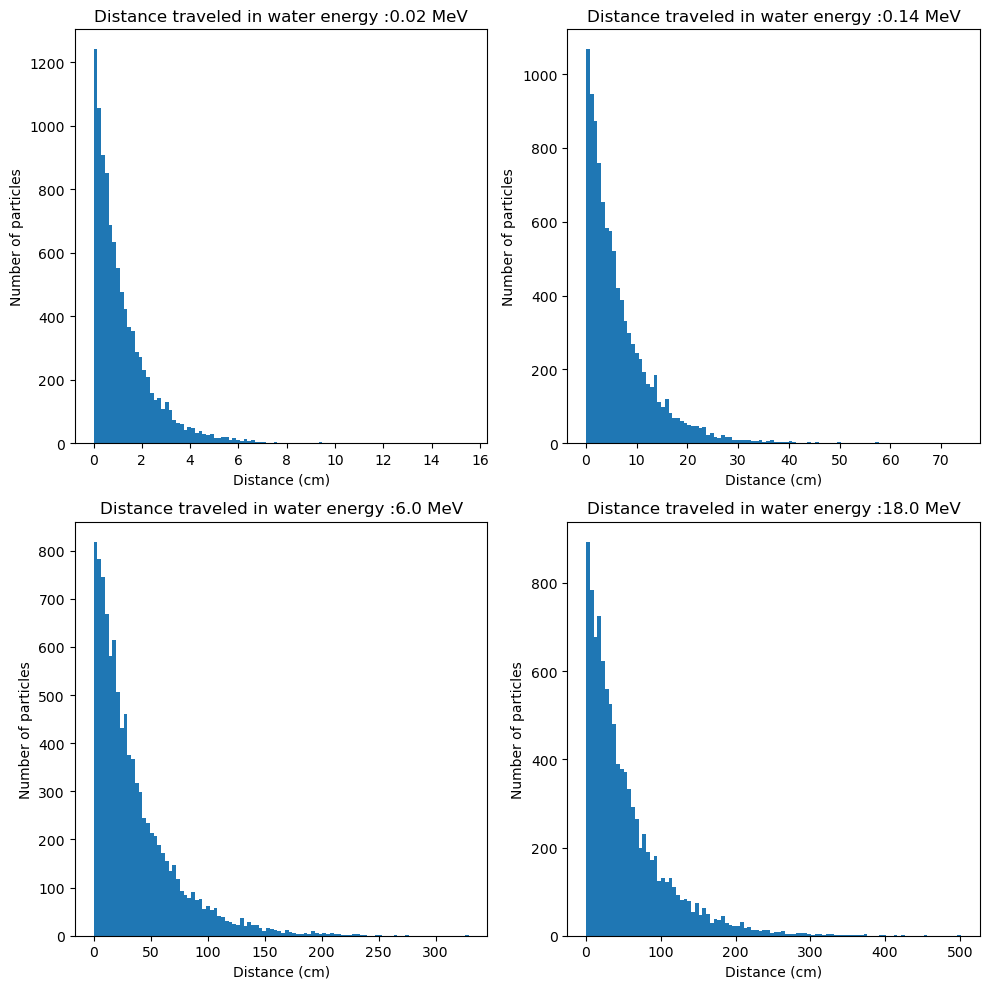

In [24]:

plt.figure(figsize=(10, 10))

for i in range(energy_value.shape[0]):
    distance = distanceTraveled(10000,data_interpolation["Total"][i],dx=1e-3)
    plt.subplot(2, 2, i+1)
    plt.hist(distance,bins=100)
    plt.xlabel("Distance (cm)")
    plt.ylabel("Number of particles")
    plt.title("Distance traveled in water energy :" + str(energy_value[i]) + " MeV")
plt.tight_layout()
plt.show()

- Méthodes d'inversion de la fonction de repartition

# **Rappel sur la Génération de Distance d'Interaction**

## Introduction

Dans le cadre de simulations Monte Carlo, la génération de distances d'interaction selon une distribution exponentielle est fondamentale. Cela intervient souvent dans la modélisation de processus aléatoires tels que la décroissance radioactive.

## Génération de $x$

On commence avec l'équation différentielle suivante :
\begin{equation}
    dP = e^{-\mu x} \mu dx
\end{equation}

La fonction de répartition (FDR) associée est définie par l'intégrale :
\begin{equation}
    F(x) = \int_{0}^{x} A \mu e^{-\mu x} dx = -\frac{1}{\mu}e^{-\mu x}\Big|_0^x  A \mu = A \cancel{\mu} \frac{1}{\cancel{\mu}} (1-e^{-\mu x}) =  A (1-e^{-\mu x})
\end{equation}

## Normalisation de la FDR

Le facteur de forme $A$ est une constante. Pour que la FDR soit égale à 1 au total, donc $\lim_{{x \to \infty}}$ F(x) = 1, on égalise $F(x)$ à 1 :
\begin{equation}
    A (1-e^{-\mu x}) = 1
\end{equation}

En résolvant cette intégrale, on obtient $A = 1$.

## Inversion de la FDR

En inversant la FDR $F(x)$, on arrive à l'expression suivante pour la distance d'interaction $x$ :
\begin{equation}
    F(x) = (1-e^{-\mu x}) \implies x = -\frac{1}{\mu} \ln(1-F(x)) \implies  x = -\frac{1}{\mu} \ln(1-R_1)
\end{equation}

où $x$ est la distance d'interaction, et $R_1$ est un nombre aléatoire $\in [0,1]$.

La génération de $x$ de cette manière garantit que la distribution des distances suit une décroissance exponentielle avec le taux $\mu$.

In [25]:
def distanceInteractionFDR(nbParticules,mu):
    finalDistance = np.zeros(nbParticules)
    
    for i in range(nbParticules):
        r1 = rd.random()
        finalDistance[i] = -np.log(1-r1)/mu
    return finalDistance





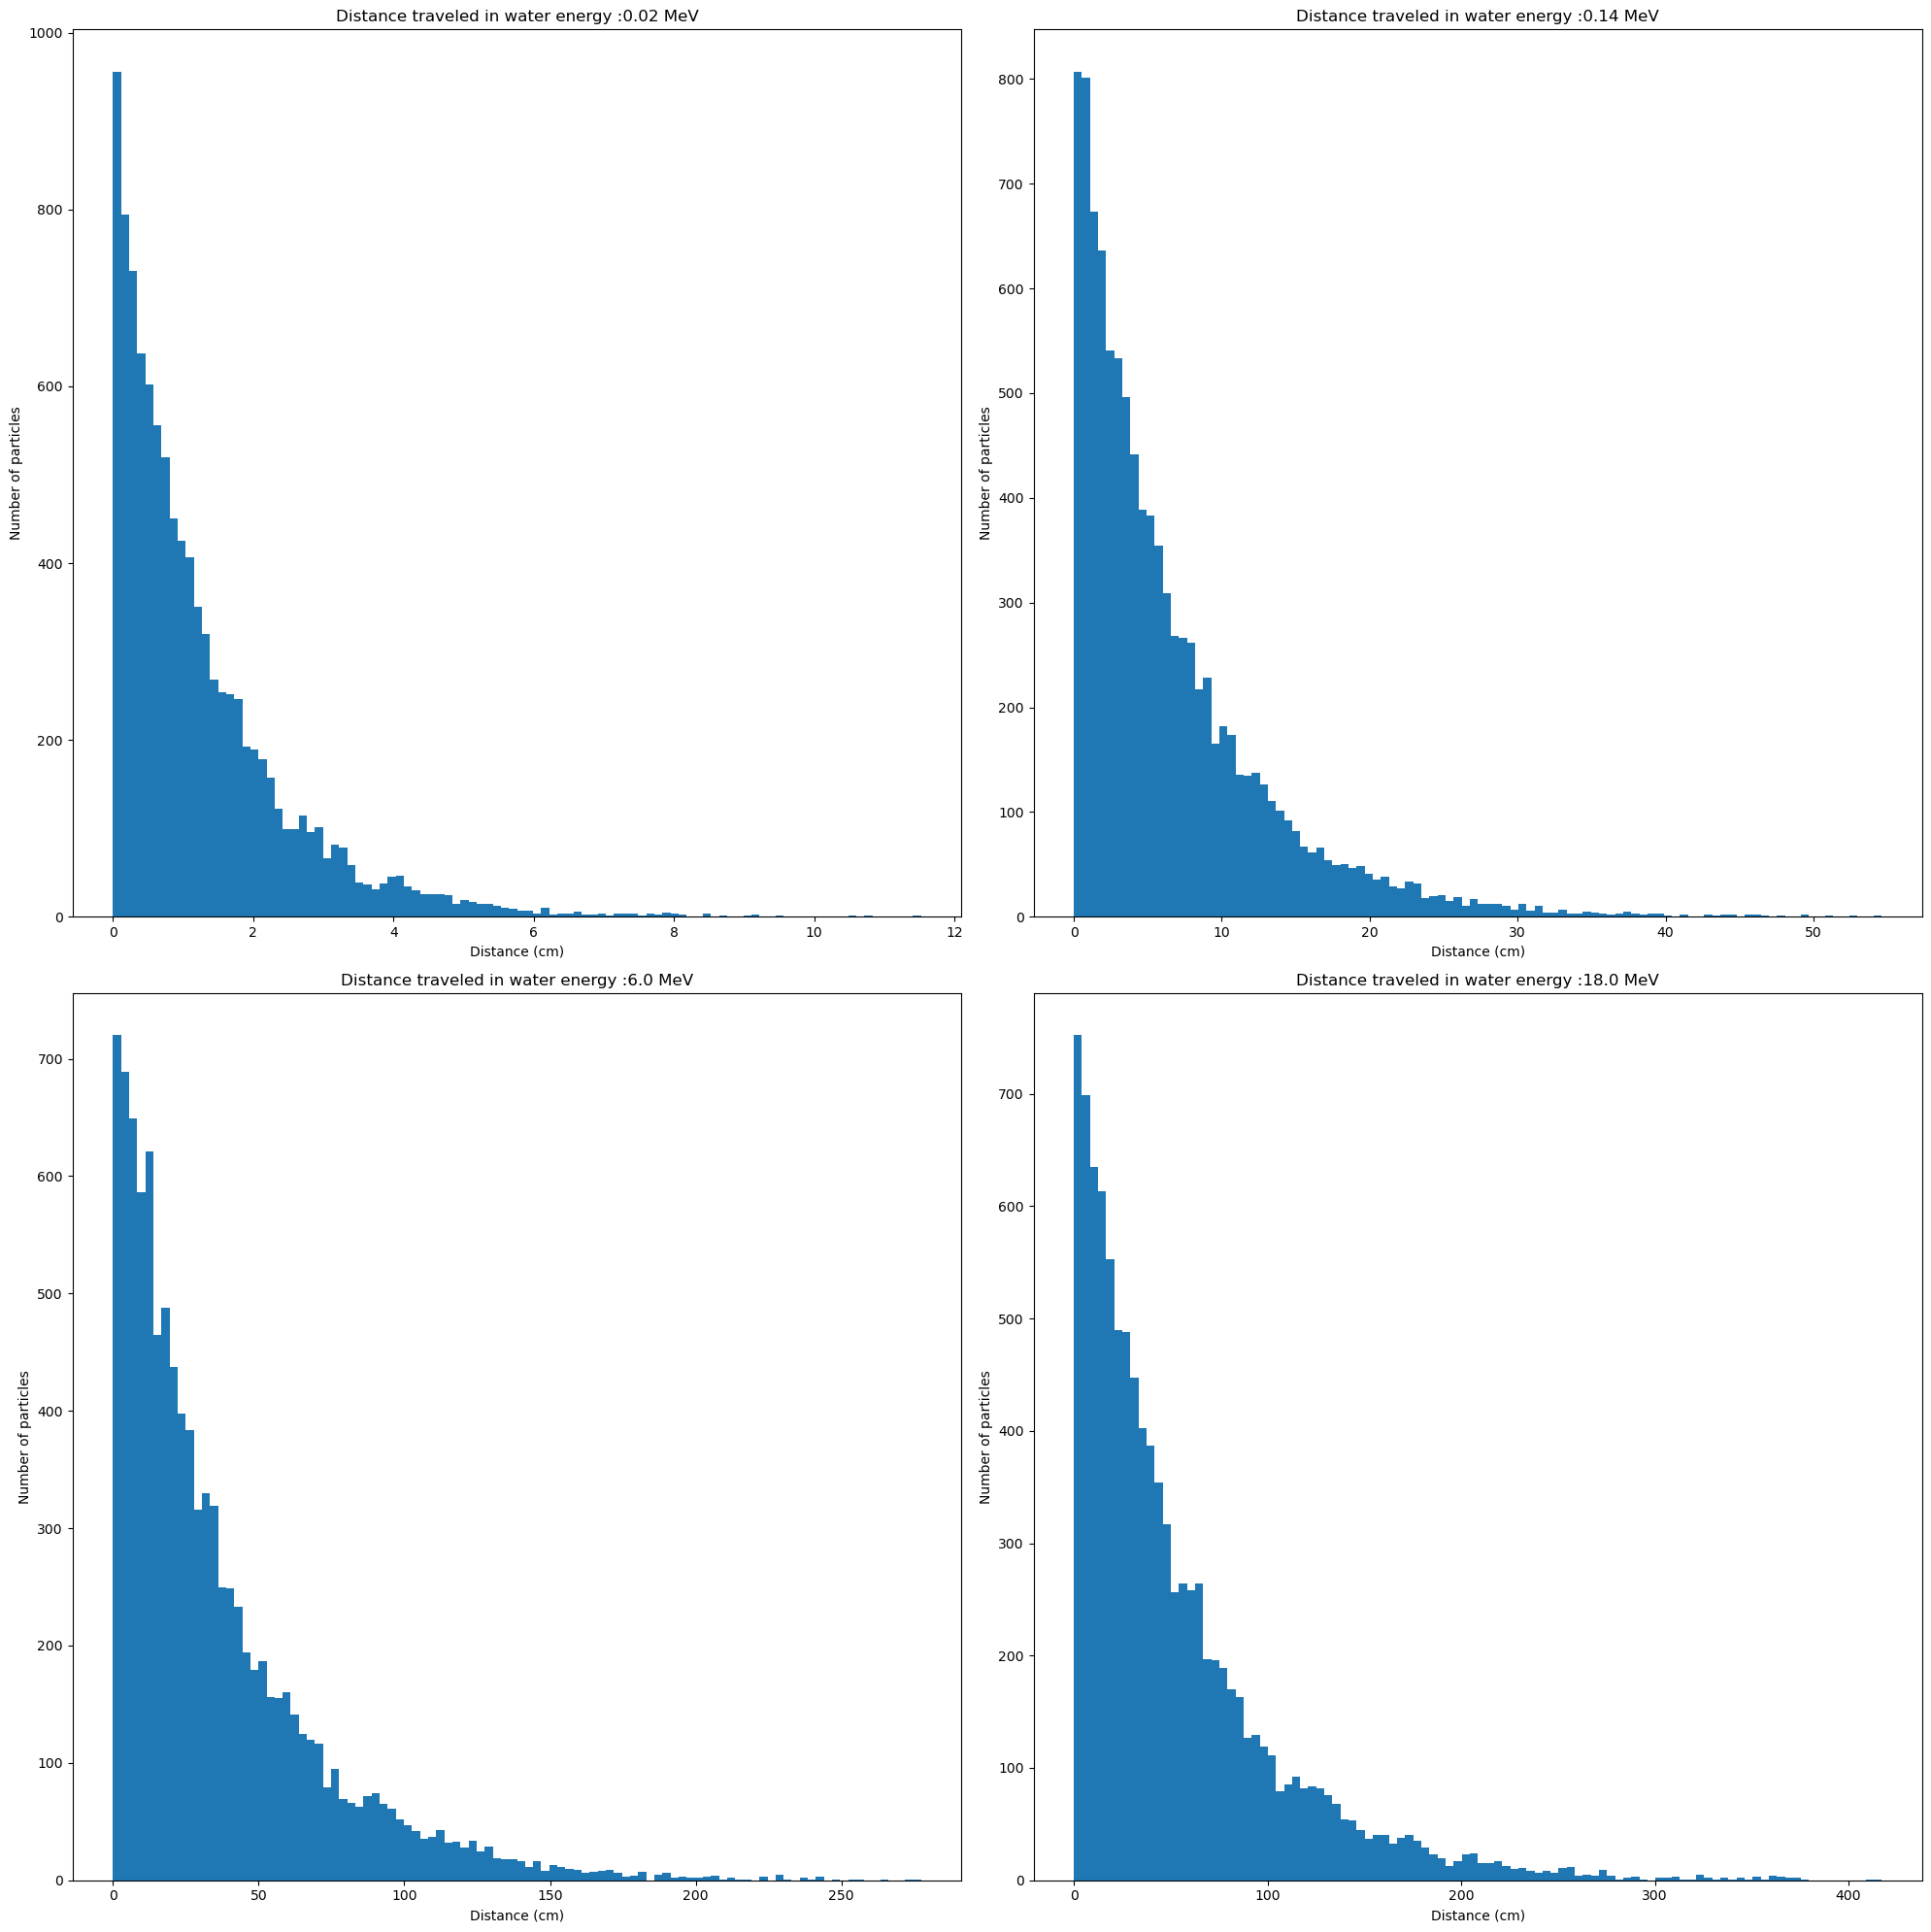

In [26]:
plt.figure(figsize=(20, 20))
for i in range(energy_value.shape[0]):
    distance = distanceInteractionFDR(10000,data_interpolation["Total"][i])
    plt.subplot(2, 2, i+1)
    plt.hist(distance,bins=100)
    plt.xlabel("Distance (cm)")
    plt.ylabel("Number of particles")
    plt.title("Distance traveled in water energy :" + str(energy_value[i]) + " MeV")
plt.tight_layout()
plt.show()

### Pour allez plus loin

In [27]:
def distanceInteractionFDRV2(nbParticules,mu):
    return -np.log(1-np.random.uniform(size=nbParticules))/mu
    

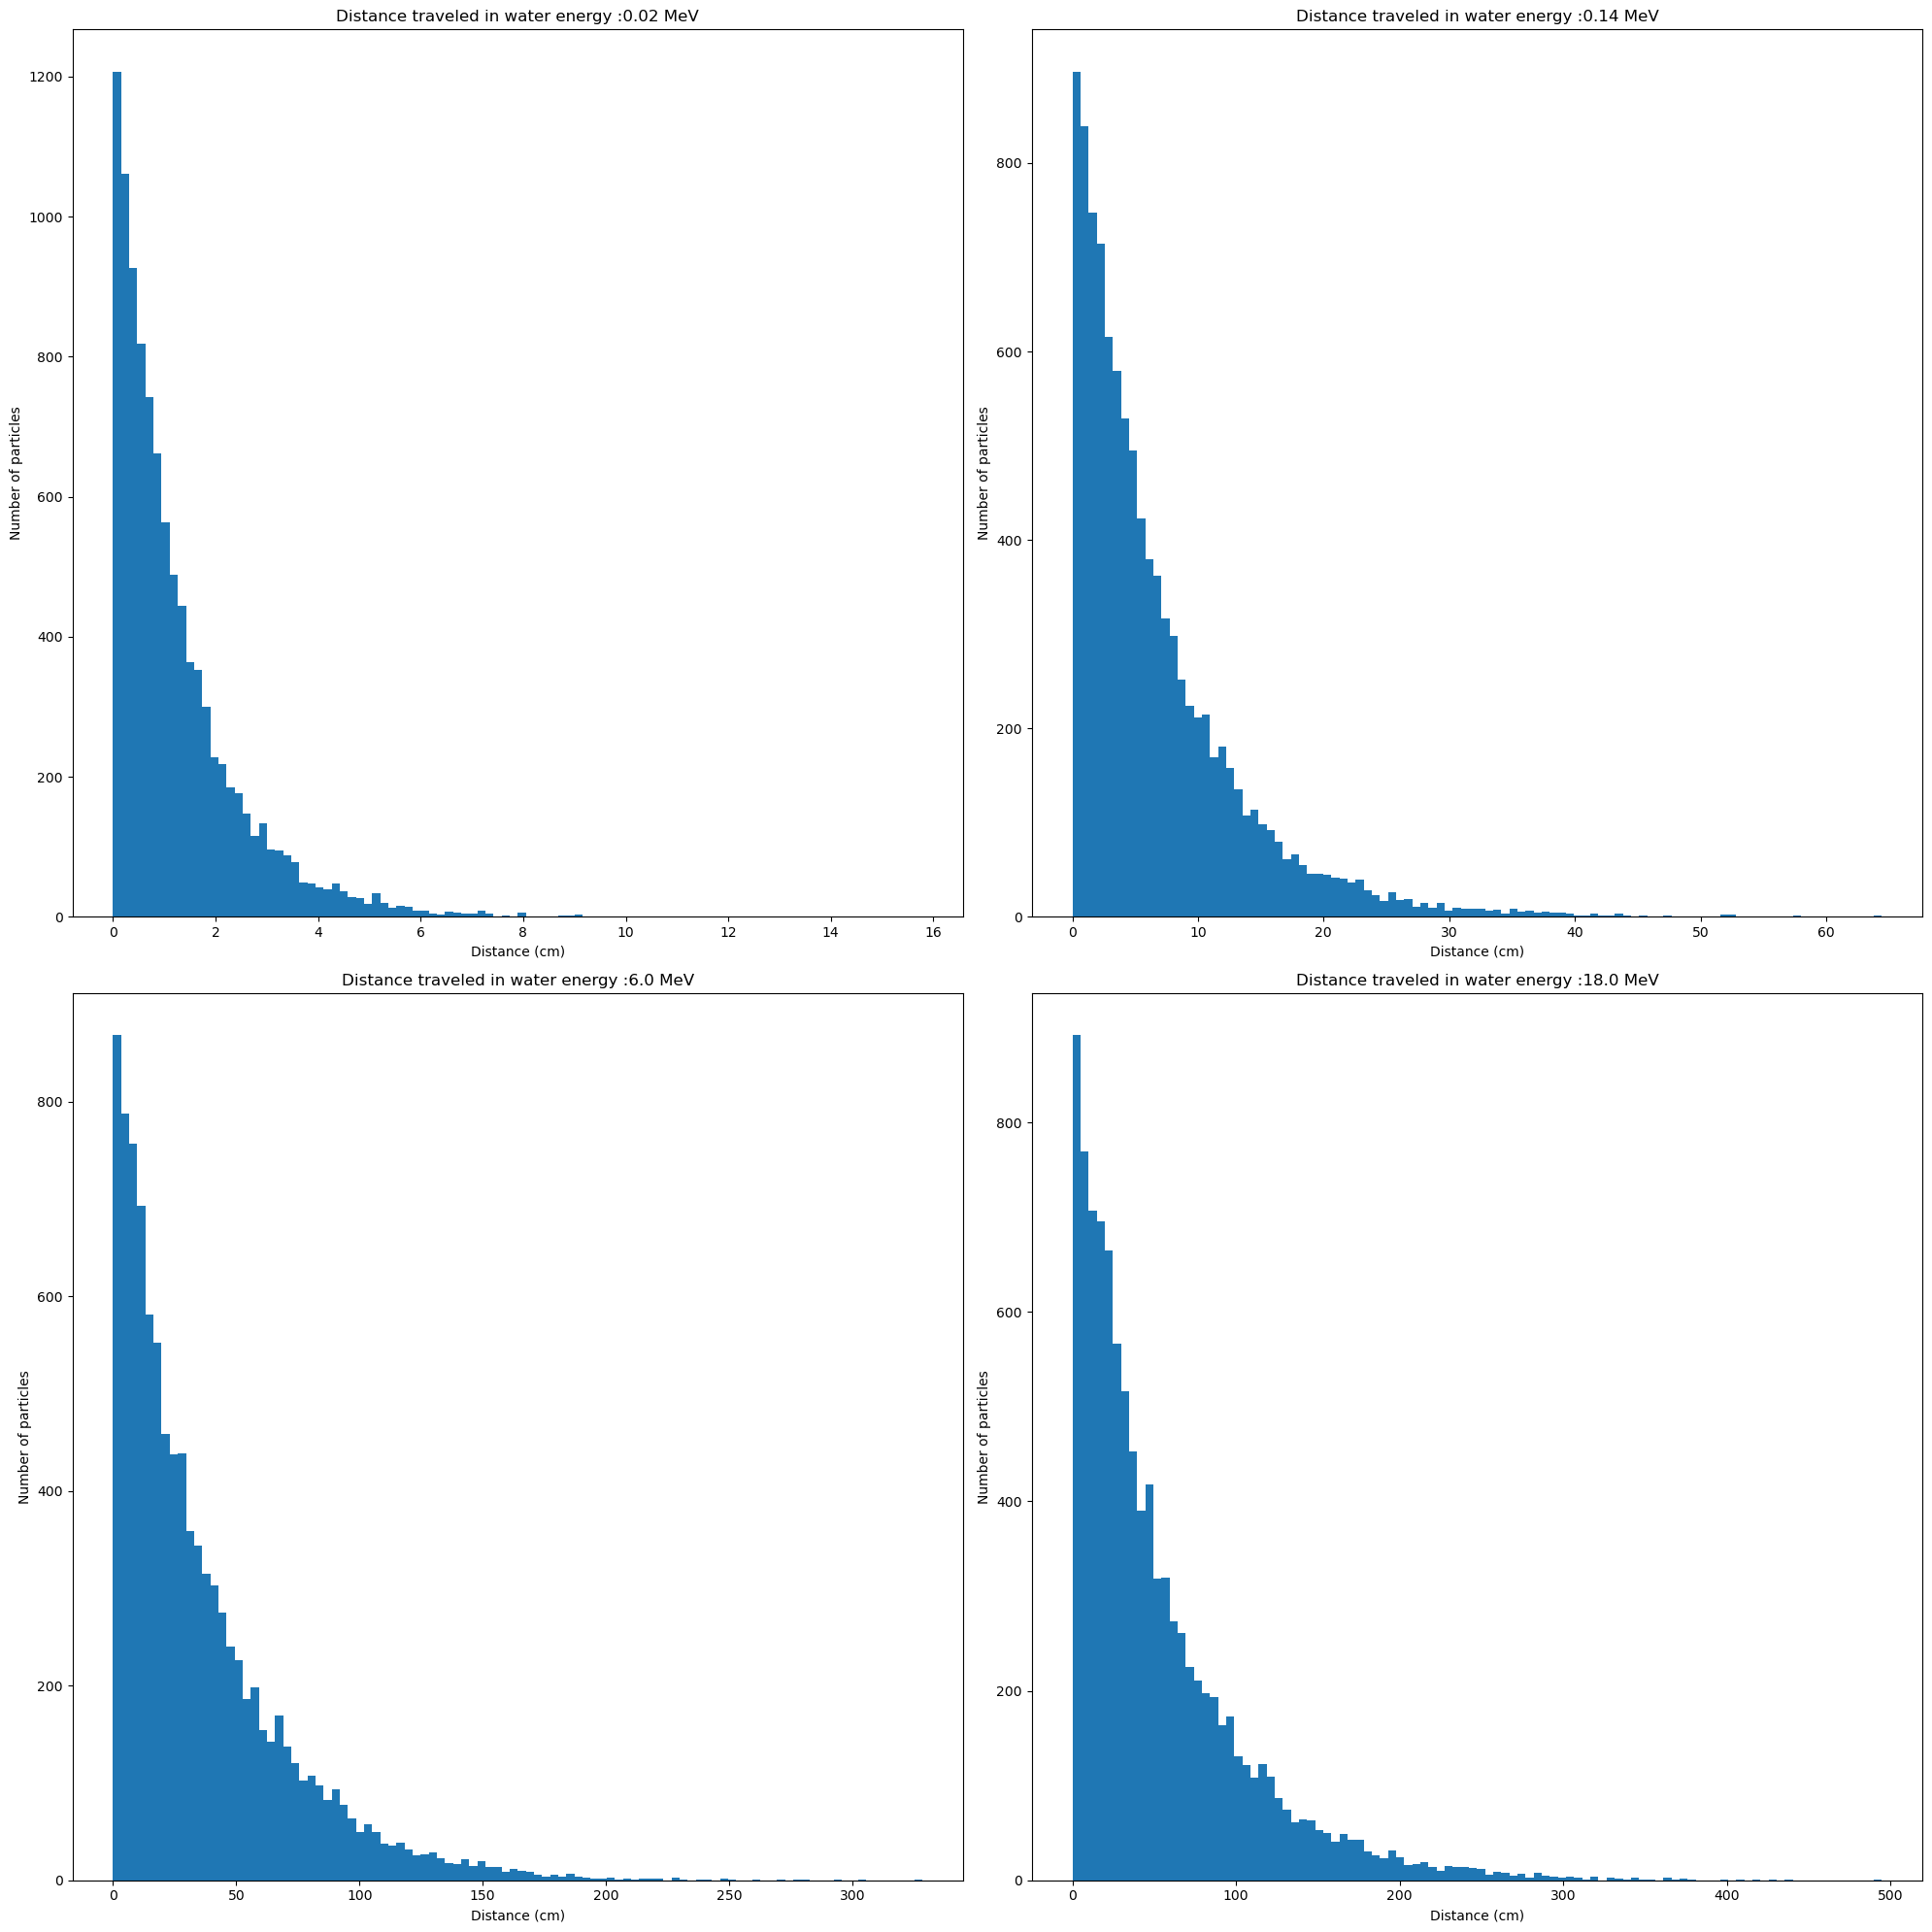

In [28]:
plt.figure(figsize=(20, 20))
for i in range(energy_value.shape[0]):
    distance = distanceInteractionFDRV2(10000,data_interpolation["Total"][i])
    plt.subplot(2, 2, i+1)
    plt.hist(distance,bins=100)
    plt.xlabel("Distance (cm)")
    plt.ylabel("Number of particles")
    plt.title("Distance traveled in water energy :" + str(energy_value[i]) + " MeV")
plt.tight_layout()
plt.show()

In [29]:
#Then we want to see the performance of the different methods

%timeit distanceTraveled(10000,data_interpolation["Total"][0])
%timeit distanceInteractionFDR(10000,data_interpolation["Total"][0])
%timeit distanceInteractionFDRV2(10000,data_interpolation["Total"][0])
# for the next questions we need to repeat the process for each energy value 1000 times we need to use an optimized method


The slowest run took 4.52 times longer than the fastest. This could mean that an intermediate result is being cached.
14.7 s ± 6.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
105 ms ± 39.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.78 ms ± 511 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## **Context**

On fera le calcul pour chaque énergie de faisceau.

## **Question 10**


10. En déduire le coefficient d’atténuation de l’eau simulé (fit exponentiel).

In [30]:
def exponential(x, a, b):
    return a*np.exp(-b*x)

# I use a mask to remove the zero values because the splitting of the histogram couldn't guarantee a
# that all the bins have a value of hist greater than zero. That could be a problem for the fit.
def fitexp(distance):
    hist, bin_edges = np.histogram(distance, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mask = hist > 0
    popt, pcov = curve_fit(exponential, bin_centers[mask], hist[mask])
    # popt, pcov = curve_fit(exponential, bin_centers, hist)
    return popt, bin_centers,pcov

/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/3921366607.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)
/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/3921366607.py:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)


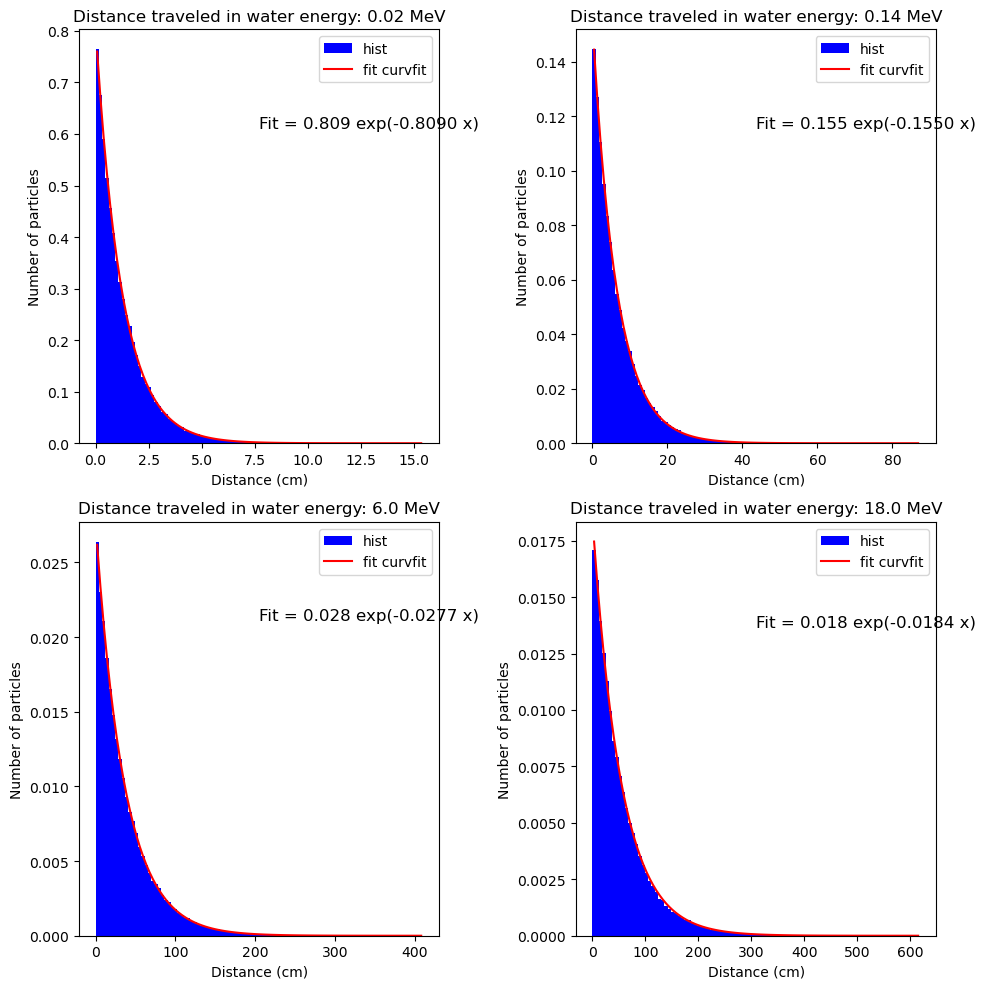

In [31]:
muTotexp = np.zeros(energy_value.shape[0])
muTotcalc = np.zeros(energy_value.shape[0])
sigmaTot = np.zeros(energy_value.shape[0])
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(energy_value.shape[0]):
    distance = distanceInteractionFDRV2(100000, data_interpolation["Total"][i])
    
    popt, bin_centers,pcov = fitexp(distance)
    muTotexp[i] = popt[1]
    muTotcalc[i] = data_interpolation["Total"][i]
    sigmaTot[i] = np.sqrt(np.diag(pcov))[1]
    plt.subplot(2, 2, i + 1)
    hist , _,_ = plt.hist(distance, bins=100, density=True, label="hist",color="blue")
    plt.plot(bin_centers, exponential(bin_centers, *popt), label="fit curvfit",color="red")
    plt.xlabel("Distance (cm)")
    plt.ylabel("Number of particles")
    plt.title("Distance traveled in water energy: " + str(energy_value[i]) + " MeV")
    plt.legend()
    # Ajuster les coordonnées pour placer le texte
    text_x = 0.5 * max(distance)
    text_y = 0.8 * max(hist)
    
    plt.text(text_x, text_y, f'Fit = {popt[0]:.3f} exp(-{popt[1]:.4f} x)', fontsize=12)
    
    

plt.tight_layout()
plt.show()

In [35]:
print(tb.tabulate(np.array([energy_value,muTotexp,muTotcalc,sigmaTot]).T, headers=["Energy (MeV)", 'μ estimated (cm⁻¹)', 'μ NIST (cm⁻¹)',"sigmaTot"],tablefmt='orgtbl'))

|   Energy (MeV) |   μ estimated (cm⁻¹) |   μ NIST (cm⁻¹) |    sigmaTot |
|----------------+----------------------+-----------------+-------------|
|           0.02 |            0.809     |       0.8096    | 0.00226174  |
|           0.14 |            0.154963  |       0.15376   | 0.000380936 |
|           6    |            0.0276968 |       0.0277    | 6.4797e-05  |
|          18    |            0.0184061 |       0.0185887 | 6.53192e-05 |


## **Question 11**


11. Faire 1000x la simulation en déduire la répartition de mu et le biais éventuel. Commentez

/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/3921366607.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)
/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/3921366607.py:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)


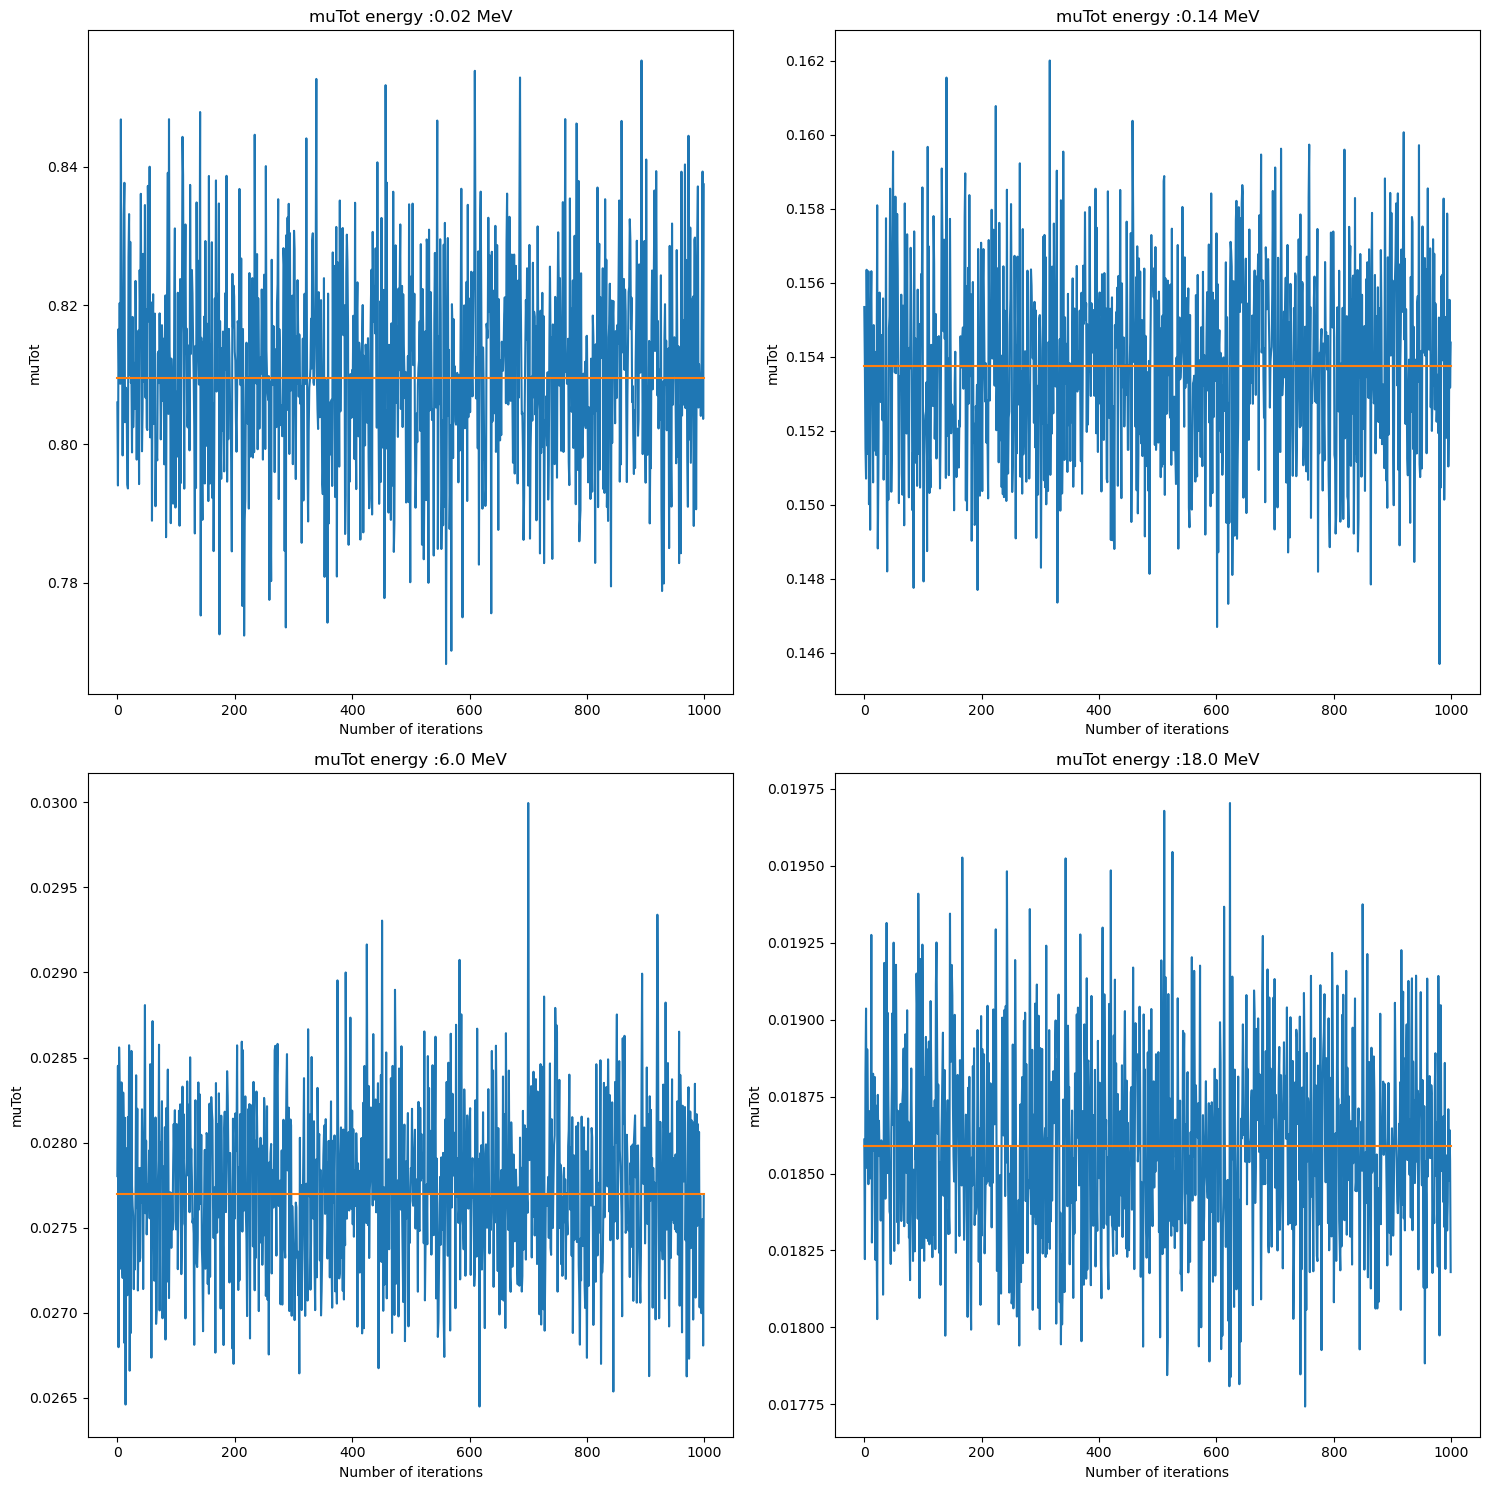

In [36]:
mu1000iter = np.zeros((energy_value.shape[0],1000))
plt.figure(figsize=(15, 15))
for i in range(energy_value.shape[0]):
    for j in range(1000):
        distance = distanceInteractionFDRV2(10000,data_interpolation["Total"][i])
        popt, bin_centers,pcov = fitexp(distance)
        mu1000iter[i,j] = popt[1]

    plt.subplot(2, 2, i+1)
    plt.plot(mu1000iter[i,:],label="muTot of iteration")
    plt.plot(data_interpolation["Total"][i]*np.ones(1000),label="muTot expected")
    plt.xlabel("Number of iterations")
    plt.ylabel("muTot")
    plt.title("muTot energy :" + str(energy_value[i]) + " MeV")
plt.tight_layout()
plt.show()

    

In [38]:
print(tb.tabulate(np.array([energy_value,data_interpolation["Total"],mu1000iter.mean(axis=1),mu1000iter.std(axis=1),(data_interpolation["Total"]-mu1000iter.mean(axis=1))/mu1000iter.mean(axis=1)]).T, headers=["Energy (MeV)", "μ NIST (cm⁻¹)", "μ Estimated (cm⁻¹)", "σ (stddev)","Relative deviation"], tablefmt="fancy_outline"))


╒════════════════╤═════════════════╤══════════════════════╤══════════════╤══════════════════════╕
│   Energy (MeV) │   μ NIST (cm⁻¹) │   μ Estimated (cm⁻¹) │   σ (stddev) │   Relative deviation │
╞════════════════╪═════════════════╪══════════════════════╪══════════════╪══════════════════════╡
│           0.02 │       0.8096    │            0.810804  │  0.0140873   │         -0.00148436  │
│           0.14 │       0.15376   │            0.153739  │  0.0025306   │          0.0001379   │
│           6    │       0.0277    │            0.0277311 │  0.000472708 │         -0.00112328  │
│          18    │       0.0185887 │            0.018594  │  0.000311045 │         -0.000288168 │
╘════════════════╧═════════════════╧══════════════════════╧══════════════╧══════════════════════╛


## **Pour aller plus loin** 

Comment varie la precision du $\mu$ en fonction du nombre de particule simulé

/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/3921366607.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)
/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_3805/3921366607.py:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)


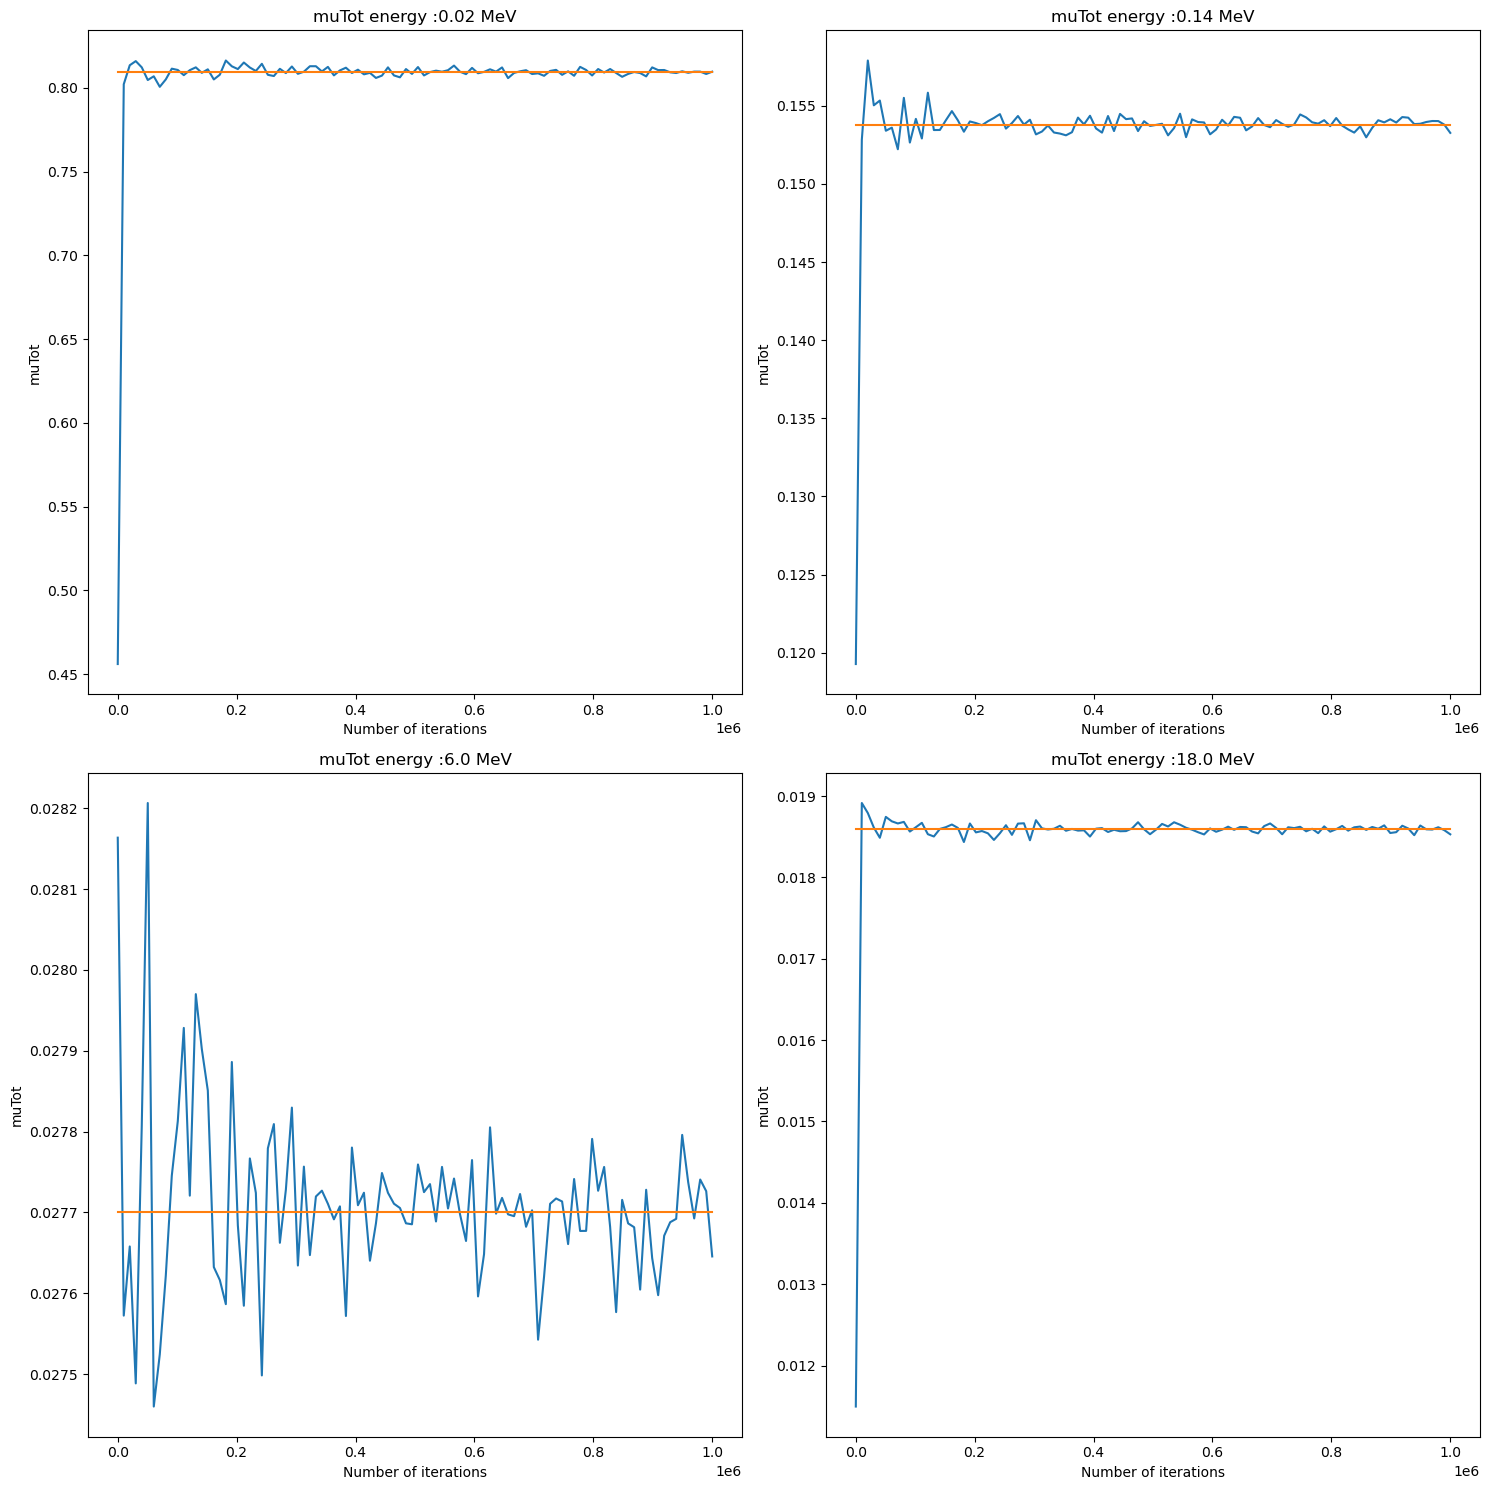

In [40]:
nbParticules = np.linspace(100,1000000,100,dtype=int)
mu1000iter = np.zeros((energy_value.shape[0],nbParticules.shape[0]))
plt.figure(figsize=(15, 15))
for i in range(energy_value.shape[0]):
    for j in range(nbParticules.shape[0]):
        distance = distanceInteractionFDRV2(nbParticules[j],data_interpolation["Total"][i])
        popt, bin_centers,pcov = fitexp(distance)
        mu1000iter[i,j] = popt[1]

    plt.subplot(2, 2, i+1)
    plt.plot( nbParticules, mu1000iter[i,:])
    plt.plot(nbParticules, data_interpolation["Total"][i]*np.ones(nbParticules.shape[0]))
    plt.xlabel("Number of iterations")
    plt.ylabel("muTot")
    plt.title("muTot energy :" + str(energy_value[i]) + " MeV")
plt.tight_layout()
plt.show()

In [41]:
def interaction_type(mu_photoelectric, mu_rayleigh, mu_compton, mu_pairproduction, nbParticules,random_number):
    """
    Determines the type of interaction based on random number generation.

    Parameters:
    - mu_photoelectric: Attenuation coefficient for photoelectric interaction.
    - mu_rayleigh: Attenuation coefficient for Rayleigh scattering.
    - mu_compton: Attenuation coefficient for Compton scattering.
    - mu_pairproduction: Attenuation coefficient for pair production.

    Returns:
    - Interaction type: "Photoelectric", "Rayleigh", "Compton", or "Pairproduction".
    """
    # Generate n random number between 0 and 1
    # rng = np.random.default_rng()
    # random_number = rng.random(nbParticules)
    type_interaction = np.zeros(nbParticules)

    # Calculate the total attenuation coefficient
    mu_total = mu_photoelectric + mu_rayleigh + mu_compton + mu_pairproduction

    interaction_type= np.where(random_number < mu_photoelectric / mu_total, "Photoelectric", 
                               np.where(random_number < (mu_photoelectric + mu_rayleigh) / mu_total, "Rayleigh",
                                        np.where(random_number < (mu_photoelectric + mu_rayleigh + mu_compton) / mu_total, "Compton",
                                                 np.where(random_number < (mu_photoelectric + mu_rayleigh + mu_compton + mu_pairproduction) / mu_total, "Pairproduction","None"))))
    # type_unique,count = np.unique(interaction_type,return_counts=True)
    # for interaction, counts in zip(type_unique,count):
    #     print("The number of " + interaction + " is " + str(counts))
        
    return interaction_type

In [42]:
def interaction_type2(mu_photoelectric, mu_rayleigh, mu_compton, mu_pairproduction, nbParticules,random_number):
    """
    Determines the type of interaction based on random number generation.

    Parameters:
    - mu_photoelectric: Attenuation coefficient for photoelectric interaction.
    - mu_rayleigh: Attenuation coefficient for Rayleigh scattering.
    - mu_compton: Attenuation coefficient for Compton scattering.
    - mu_pairproduction: Attenuation coefficient for pair production.

    Returns:
    - Interaction type: "Photoelectric", "Rayleigh", "Compton", or "Pairproduction".
    """
    
    # Calculate the total attenuation coefficient
    mu_total = mu_photoelectric + mu_rayleigh + mu_compton + mu_pairproduction

    # Determine the interaction type for each particle
    interaction_type = np.zeros(nbParticules, dtype='U14')  # 'U14' corresponds to unicode strings of length 14
    condition_photoelectric = random_number < mu_photoelectric / mu_total
    
    condition_rayleigh = ((random_number >= mu_photoelectric / mu_total) & 
                          (random_number < (mu_photoelectric + mu_rayleigh) / mu_total))
    condition_compton = ((random_number >= (mu_photoelectric + mu_rayleigh) / mu_total) & 
                         (random_number < (mu_photoelectric + mu_rayleigh + mu_compton) / mu_total))
    
    condition_pairproduction = (random_number >= (mu_photoelectric + mu_rayleigh + mu_compton) / mu_total)

    interaction_type[condition_photoelectric] = "Photoelectric"
    interaction_type[condition_rayleigh] = "Rayleigh"
    interaction_type[condition_compton] = "Compton"
    interaction_type[condition_pairproduction] = "Pairproduction"
    

        
    return interaction_type

In [43]:
rng = np.random.default_rng()
random_number = rng.random(10000)
%timeit interaction_type(data_interpolation["Absorption"][0],data_interpolation["Rayleigh"][0],data_interpolation["Scattering"][0],data_interpolation["PairProd"][0],10000,random_number)
%timeit interaction_type2(data_interpolation["Absorption"][0],data_interpolation["Rayleigh"][0],data_interpolation["Scattering"][0],data_interpolation["PairProd"][0],10000,random_number)

1.33 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
544 µs ± 239 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
